### Histórico de Versões
V1 - 01/06/2020

# <font color=blue>**Contexto**</font>

Esse é um projeto de machine learning desenvolvido com o objetivo de aprender sobre Data Science e Machine Learning.

### **Sobre o naufrágio do Titanic**

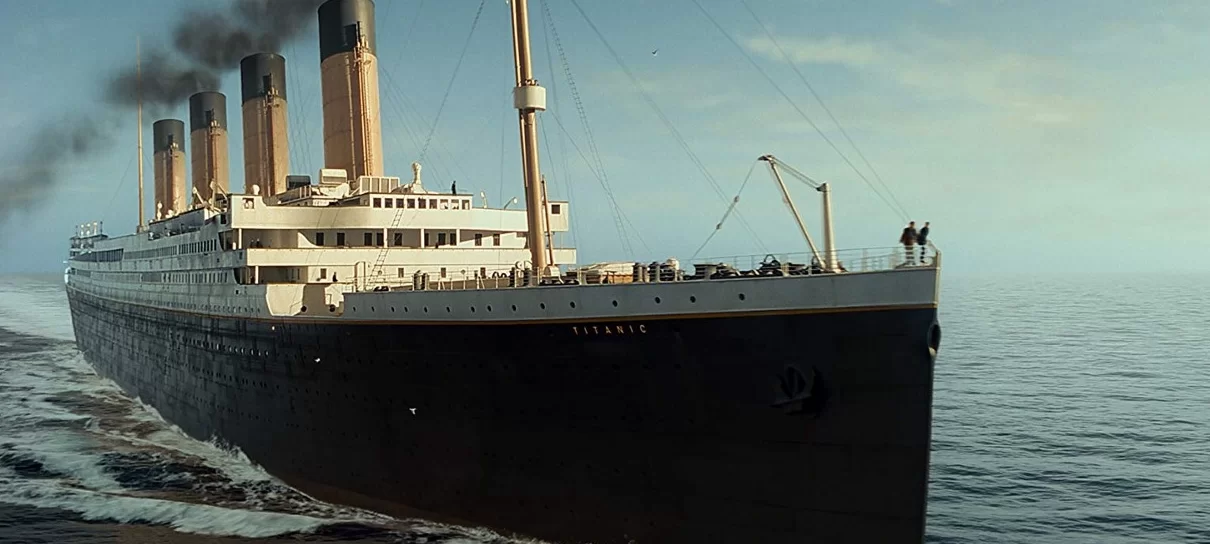

O RMS Titanic, conhecido popularmente como Titanic, era um navio de passageiros britânico que ganhou notoriedade por ser considerado "inafundável". Projetado para ser a embarcação mais segura de sua época, essa confiança excessiva pode ter contribuído para a tragédia que culminou no naufrágio durante sua viagem inaugural.

Na fatídica noite de 14 de abril de 1912, após colidir com um iceberg, desencadeou-se uma das maiores tragédias da história marítima - o naufrágio do Titanic. Um elemento crucial dessa tragédia foi a falta de botes salva-vidas em número suficiente para os 2208 ocupantes a bordo. Essa escassez provocou indignação entre os sobreviventes e foi o catalisador para a criação, em 1914, da Convenção Internacional para a Salvaguarda da Vida Humana no Mar (SOLAS, em inglês).

Atualmente, os destroços do Titanic repousam no fundo do Atlântico Norte, sofrendo contínua corrosão devido à presença de sal na água.

### **Descrição dos dados**

* Passengerld - Passageiro
* Survival - Sobrevivência (0 = Não; 1 = Sim). Não incluído no arquivo test.csv.
* Pclass - Classe de passageiros (1 = 1º; 2 = 2º; 3 = 3º)
* Name - Noome
* Sex - Sexo
* Age - Idade
* Sibsp - Número de irmãos/cônjuges a bordo
* Parch - Número de pais/filhos a bordo
* Ticket - Número do bilhete
* Fare - Tarifa de passageiro
* Cabin - Cabine
* Embarked - Porto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

# <font color=blue>**Machine Learning**</font>

Como dito anteriormente, somos 2 estudantes buscando aprofundar nossos conhecimentos em machine learning e data science.
Sendo assim, vamos a parte que interessa

### <font color=orange>**Verificando a Versão da Linguagem Python**</font>

* Esse código Python exibe a versão da linguagem Python que está sendo usada no ambiente do Jupyter Notebook. Ele importa a função python_version do módulo platform e, em seguida, imprime a versão do Python. Isso é útil para verificar a versão da linguagem e garantir que seu código seja compatível com essa versão específica.

In [57]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


### <font color=orange>**Importando as bibliotecas**</font>

Iniciamos com a importação das bibliotecas que serão utilizadas no projeto de machine learning

* No código a seguir, está sendo realizado um pré-processamento de dados utilizando as bibliotecas **numpy** e **pandas** para manipulação e análise de dados. A biblioteca **math** é importada para operações matemáticas, enquanto **seaborn**, **missingno** e **matplotlib.pyplot** são utilizadas para visualização de dados, incluindo a detecção de valores ausentes. Através da biblioteca **sklearn**, são importados módulos específicos como **RandomForestClassifier** e **SimpleImputer** para a construção de um modelo de classificação e imputação de valores faltantes, respectivamente. A biblioteca **itertools** é empregada para iterações eficientes. O código demonstra uma abordagem abrangente para explorar e preparar dados, integrando diversas ferramentas essenciais. A clareza na escolha das bibliotecas e a organização do código refletem uma prática de desenvolvimento eficiente, priorizando a simplicidade e eficácia.

In [197]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report ,accuracy_score
import itertools

* No código a seguir, está sendo utilizado Python para percorrer recursivamente o diretório '/kaggle/input' por meio da biblioteca **os**. A estrutura de repetição for é empregada para iterar sobre os diretórios e arquivos encontrados, utilizando as variáveis dirname, _ (underscore), e filenames. Dentro do segundo loop for, a função print exibe o caminho completo de cada arquivo, unindo o diretório e o nome do arquivo com a função os.path.join. Com esse código, é possível listar todos os arquivos presentes no diretório fornecido.

In [59]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Você pode gravar até 5 GB no diretório atual (/kaggle/working/) que é preservado como saída quando você cria 
# uma versão usando "Salvar e executar tudo."
# Você também pode gravar arquivos temporários em /kaggle/temp/, mas eles não serão salvos fora da sessão atual.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### <font color=orange>**Importando os dados**</font>

Aqui importamos as bases de dados que serão utilizadas para treinar e testar o modelo, respectivamente

* No código a seguir, está sendo realizado o carregamento de dados para um projeto de análise do conjunto de dados do Titanic em Python. Utilizando a biblioteca **pandas**, as informações contidas nos arquivos CSV "train.csv" e "test.csv" são lidas e armazenadas nas variáveis **train** e **test**, respectivamente. Esses conjuntos de dados geralmente são utilizados em tarefas de aprendizado de máquina para prever a sobrevivência dos passageiros do Titanic com base em diferentes variáveis. A função **read_csv** do pandas facilita a importação e manipulação desses dados tabulares, fornecendo uma estrutura conveniente para análises subsequentes. Esse código inicializa o projeto ao carregar as informações essenciais, preparando o terreno para análises mais aprofundadas e modelagem preditiva.

In [60]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

### <font color=orange>**Explorando os dados**</font>

Aqui optamos por expor algumas das informações sobre as bases de dados, para que seja mais fácil de se ter uma ideia de com o que estamos trabalhando

* No código a seguir, está sendo utilizado um comando para exibir as primeiras e as últimas 10 linhas do conjunto de dados de treinamento. As funções **head(10)** e **tail(10)** pertence à biblioteca **pandas**, uma ferramenta essencial para manipulação e análise de dados em Python. Essas funções específicas permitem visualizar as primeiras e últimas 10 linhas do DataFrame, fornecendo uma rápida visão geral dos dados. É comum utilizar esses métodos no início da análise exploratória de dados para compreender a estrutura e os valores iniciais do conjunto de treinamento. Essa abordagem facilita a identificação de padrões, tendências ou possíveis questões nos dados, contribuindo para uma análise mais eficiente e informada.

In [61]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


* No código a seguir, está sendo utilizado o método **describe()** no conjunto de dados de treinamento. Este método é pertencente à biblioteca **pandas** e fornece estatísticas descritivas, como média, desvio padrão, valores mínimo e máximo, para cada coluna do conjunto de dados. A função **describe()** é frequentemente utilizada na análise exploratória de dados para obter uma visão geral das características estatísticas das variáveis. No contexto do código apresentado, ela ajuda a entender a distribuição e as tendências dos dados no conjunto de treinamento, auxiliando assim na tomada de decisões sobre pré-processamento ou modelagem subsequente. Esse tipo de análise estatística é essencial para garantir uma compreensão sólida dos dados e, consequentemente, aprimorar a qualidade dos modelos desenvolvidos.

In [63]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
train.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


* No código a seguir, está sendo exibido o nome das colunas de treino de um conjunto de dados. Utilizando a linguagem de programação Python, a função **print** é empregada para mostrar a frase "O nome das colunas de treino são:" no console. Em seguida, a **print** é usada novamente em conjunto com a variável **train.columns**, destacada em negrito, para exibir os nomes das colunas do conjunto de dados de treino. Essa abordagem simples e direta proporciona uma visão rápida das colunas envolvidas no treinamento.

In [65]:
print("O nome das colunas de treino são:")
print(train.columns)

O nome das colunas de treino são:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [66]:
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [67]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [68]:
test.describe().round()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.0,418.0,332.0,418.0,418.0,417.0
mean,1100.0,2.0,30.0,0.0,0.0,36.0
std,121.0,1.0,14.0,1.0,1.0,56.0
min,892.0,1.0,0.0,0.0,0.0,0.0
25%,996.0,1.0,21.0,0.0,0.0,8.0
50%,1100.0,3.0,27.0,0.0,0.0,14.0
75%,1205.0,3.0,39.0,1.0,0.0,32.0
max,1309.0,3.0,76.0,8.0,9.0,512.0


* No código a seguir, está sendo exibido o nome das colunas de teste de um conjunto de dados. Utilizando a linguagem de programação Python, a função **print** é empregada para mostrar a frase "O nome das colunas de treino são:" no console. Em seguida, a **print** é usada novamente em conjunto com a variável **train.columns**, destacada em negrito, para exibir os nomes das colunas do conjunto de dados de teste. Essa abordagem simples e direta proporciona uma visão rápida das colunas envolvidas no teste.

In [69]:
print("O nome das colunas de teste são:")
print(test.columns)

O nome das colunas de teste são:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


* Nos códigos a seguir, está sendo realizado um processo para calcular o consumo de memória da base de treino e texte. Inicialmente, são exibidas as informações sobre o consumo de memória em termos de Bytes, KBytes e MBytes. O trecho `print("A base de treino possui:")` é responsável por imprimir a mensagem indicando o início da apresentação dos resultados. As funções **train.memory_usage().sum()** e **test.memory_usage().sum()** são utilizadas para obter a soma total do consumo de memória da base de treino e de teste em Bytes. Em seguida, são exibidas as quantidades correspondentes em KBytes e MBytes, calculadas através das operações de divisão por 1024. Estes códigos fornecem uma visão rápida e clara do volume de memória ocupados pela base de treino e teste, sendo útil para avaliações de desempenho e otimizações necessárias no contexto de análise de dados.

In [70]:
print("A base de treino possui:")
print(train.memory_usage().sum(),"Bytes ou ")
print(train.memory_usage().sum()/1024,"KBytes ou ")
print(train.memory_usage().sum()/1024/1024,"MBytes")

A base de treino possui:
85664 Bytes ou 
83.65625 KBytes ou 
0.081695556640625 MBytes


In [71]:
print("E a base de teste... :")
print(test.memory_usage().sum(),"Bytes ou ")
print(test.memory_usage().sum()/1024,"KBytes ou ")
print(test.memory_usage().sum()/1024/1024,"MBytes")

E a base de teste... :
36912 Bytes ou 
36.046875 KBytes ou 
0.0352020263671875 MBytes


* No código a seguir, está sendo apresentado um script simples em Python para exibir informações sobre os conjuntos de dados de treino e teste. Utilizando a biblioteca **pandas**, o código inicia imprimindo a mensagem "Informações acerca de Train" seguida por uma linha composta por 40 caracteres underscore para destacar visualmente a seção. Em seguida, a função **info()** é aplicada ao conjunto de treino, proporcionando um resumo conciso das informações, como a presença de valores nulos, o tipo de dados de cada coluna e a contagem total de entradas. O mesmo procedimento é repetido para o conjunto de teste, seguindo a mesma estrutura de apresentação. Esse código é útil para obter insights rápidos sobre a estrutura e integridade dos dados, facilitando a identificação de possíveis desafios ou áreas de interesse durante a análise exploratória.

In [72]:
print("Informações acerca de Train")
print("_"*40)
train.info()

Informações acerca de Train
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
print("Informações acerca de Test")
print("_"*40)
test.info()

Informações acerca de Test
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* No código a seguir, está sendo exibido o número de valores ausentes nos conjuntos de dados de treino e teste. Utilizando a biblioteca **pandas**, as informações sobre valores nulos são apresentadas de maneira clara e organizada. As linhas "print("Informações acerca de Train")" e "print("Informações acerca de Test")" indicam as seções relacionadas aos conjuntos de treino e teste, respectivamente, seguidas por uma linha de traços para melhorar a legibilidade. A função **isna()** é empregada para identificar valores nulos, e a função **sum()** contabiliza a quantidade de nulos em cada coluna.

In [74]:
print("Informações acerca de Train")
print("-"* 30)
print(train.isna().sum())

Informações acerca de Train
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [75]:
print("Informações acerca de Test")
print("-"* 30)
print(test.isna().sum())

Informações acerca de Test
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* No código a seguir, está sendo exibido o número de linhas e colunas dos conjuntos de dados de treino (_train_) e teste (_test_). As linhas iniciais utilizam a função **print** para mostrar as mensagens "Dimensões de Train" e "Linhas, Colunas" no console. Em seguida, é utilizada a função **shape** do Pandas para apresentar as dimensões do conjunto de treino, exibindo o número de linhas e colunas. O mesmo procedimento é repetido para o conjunto de teste, proporcionando uma visão rápida das dimensões desses conjuntos. Essa abordagem é útil para compreender a estrutura e o tamanho dos dados, facilitando análises posteriores e a seleção de métodos apropriados para o desenvolvimento do modelo.

In [76]:
print("Dimensões de Train")
print("Linhas, Colunas")
print(train.shape)

Dimensões de Train
Linhas, Colunas
(891, 12)


In [77]:
print("Dimensões de Test")
print("Linhas, Colunas")
print(test.shape)

Dimensões de Test
Linhas, Colunas
(418, 11)


* No código a seguir, está sendo realizado o print das variáveis presentes nos conjuntos de treino (_**train**_) e teste (_**test**_). Utilizando a função _**list()**_, as variáveis são convertidas em listas e, em seguida, são exibidas por meio da função _**print()**_. A expressão "\n\n" é utilizada para adicionar espaçamento entre as linhas, proporcionando uma apresentação mais organizada. O código oferece uma visão rápida das variáveis contidas nos conjuntos, facilitando a compreensão e a análise dos dados.

In [78]:
print("Essas são todas as variáveis presentes: \n\n", list(train))

Essas são todas as variáveis presentes: 

 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* No código a seguir, está sendo utilizado Python para realizar combinações de características (features) do conjunto de dados de treino (train) e teste (test). A variável **cont** é inicializada como zero e incrementada em cada iteração do loop while até atingir o valor 8. Dentro do loop, a biblioteca **itertools** é empregada para gerar combinações de características a partir da lista composta pelas colunas "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare" e "Embarked" do conjunto de dados. As combinações são impressas no console. Esse processo é repetido para os conjuntos de dados de treino e teste, contribuindo para a exploração de diferentes conjuntos de características possíveis. Essa abordagem é útil em tarefas de aprendizado de máquina, permitindo examinar diferentes combinações de variáveis para identificar padrões e otimizar o desempenho do modelo preditivo. O código utiliza estruturas de controle de fluxo, como loops while e for, para iterar sobre as combinações desejadas.

In [79]:
cont = 0
while cont<8:
    cont = cont+1
    for i in itertools.combinations(list(train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]),cont):
        print(i)

('Pclass',)
('Sex',)
('Age',)
('SibSp',)
('Parch',)
('Fare',)
('Embarked',)
('Pclass', 'Sex')
('Pclass', 'Age')
('Pclass', 'SibSp')
('Pclass', 'Parch')
('Pclass', 'Fare')
('Pclass', 'Embarked')
('Sex', 'Age')
('Sex', 'SibSp')
('Sex', 'Parch')
('Sex', 'Fare')
('Sex', 'Embarked')
('Age', 'SibSp')
('Age', 'Parch')
('Age', 'Fare')
('Age', 'Embarked')
('SibSp', 'Parch')
('SibSp', 'Fare')
('SibSp', 'Embarked')
('Parch', 'Fare')
('Parch', 'Embarked')
('Fare', 'Embarked')
('Pclass', 'Sex', 'Age')
('Pclass', 'Sex', 'SibSp')
('Pclass', 'Sex', 'Parch')
('Pclass', 'Sex', 'Fare')
('Pclass', 'Sex', 'Embarked')
('Pclass', 'Age', 'SibSp')
('Pclass', 'Age', 'Parch')
('Pclass', 'Age', 'Fare')
('Pclass', 'Age', 'Embarked')
('Pclass', 'SibSp', 'Parch')
('Pclass', 'SibSp', 'Fare')
('Pclass', 'SibSp', 'Embarked')
('Pclass', 'Parch', 'Fare')
('Pclass', 'Parch', 'Embarked')
('Pclass', 'Fare', 'Embarked')
('Sex', 'Age', 'SibSp')
('Sex', 'Age', 'Parch')
('Sex', 'Age', 'Fare')
('Sex', 'Age', 'Embarked')
('Sex', 

In [80]:
print("Essas são todas as variáveis presentes: \n\n", list(test))

Essas são todas as variáveis presentes: 

 ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [81]:
cont = 0
while cont<8:
    cont = cont+1
    for i in itertools.combinations(list(test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]),cont):
        print(i)

('Pclass',)
('Sex',)
('Age',)
('SibSp',)
('Parch',)
('Fare',)
('Embarked',)
('Pclass', 'Sex')
('Pclass', 'Age')
('Pclass', 'SibSp')
('Pclass', 'Parch')
('Pclass', 'Fare')
('Pclass', 'Embarked')
('Sex', 'Age')
('Sex', 'SibSp')
('Sex', 'Parch')
('Sex', 'Fare')
('Sex', 'Embarked')
('Age', 'SibSp')
('Age', 'Parch')
('Age', 'Fare')
('Age', 'Embarked')
('SibSp', 'Parch')
('SibSp', 'Fare')
('SibSp', 'Embarked')
('Parch', 'Fare')
('Parch', 'Embarked')
('Fare', 'Embarked')
('Pclass', 'Sex', 'Age')
('Pclass', 'Sex', 'SibSp')
('Pclass', 'Sex', 'Parch')
('Pclass', 'Sex', 'Fare')
('Pclass', 'Sex', 'Embarked')
('Pclass', 'Age', 'SibSp')
('Pclass', 'Age', 'Parch')
('Pclass', 'Age', 'Fare')
('Pclass', 'Age', 'Embarked')
('Pclass', 'SibSp', 'Parch')
('Pclass', 'SibSp', 'Fare')
('Pclass', 'SibSp', 'Embarked')
('Pclass', 'Parch', 'Fare')
('Pclass', 'Parch', 'Embarked')
('Pclass', 'Fare', 'Embarked')
('Sex', 'Age', 'SibSp')
('Sex', 'Age', 'Parch')
('Sex', 'Age', 'Fare')
('Sex', 'Age', 'Embarked')
('Sex', 

* No código a seguir, está sendo calculada a **matriz de correlação** (`corr_matrix`) entre as variáveis numéricas do conjunto de treinamento (`train`). Em seguida, é criado um **heatmap** (mapa de calor) usando a biblioteca **seaborn**. O heatmap visualiza a matriz de correlação, sendo que as células são coloridas de acordo com o valor da correlação. Os parâmetros utilizados incluem a exibição dos valores dentro das células (`annot=True`), a escolha do mapa de cores "coolwarm" (`cmap="coolwarm"`), e a definição dos limites inferior e superior para as cores (-1 e 1, respectivamente). Para aprimorar a apresentação, o título do heatmap é definido como "Matriz de Correlação Entre Variáveis Numéricas", os tamanhos das fontes dos ticks são reduzidos (`ax.tick_params(labelsize=12)`), e os rótulos no eixo X são girados em 90 graus (`ax.set_xticklabels(ax.get_xticklabels(), rotation=90)`). O resultado final é uma representação visual da correlação entre as variáveis numéricas, facilitando a identificação de padrões e relações no conjunto de dados.

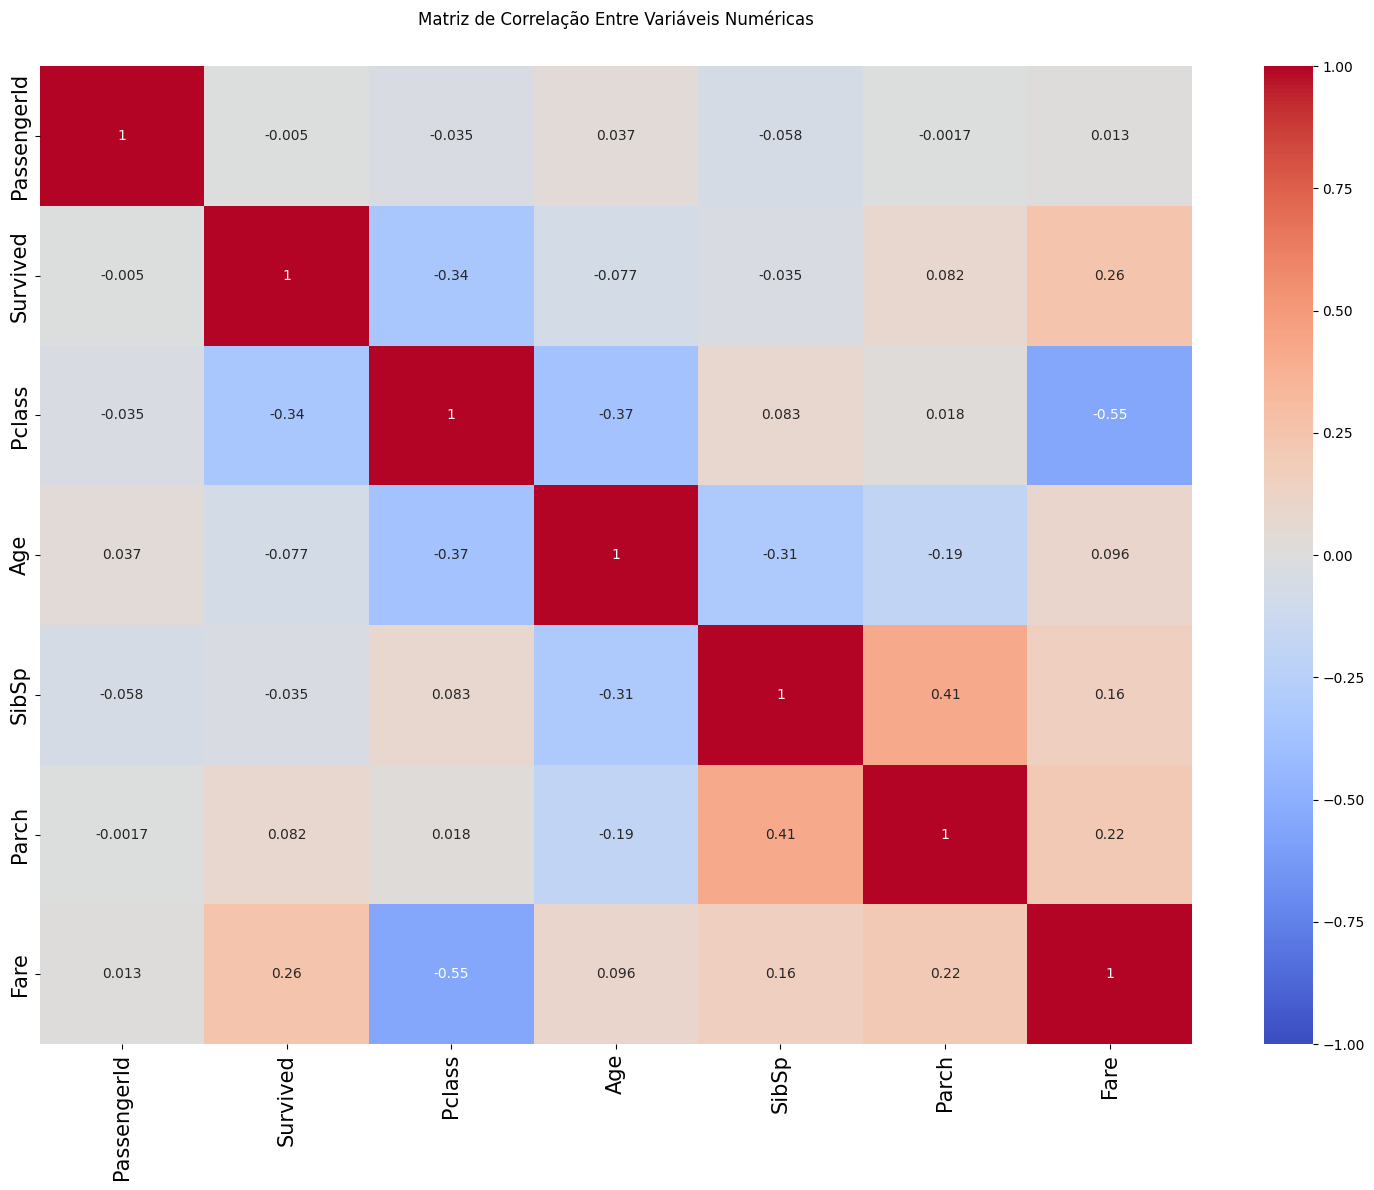

In [83]:
# Calcula a matriz de correlação
corr_matrix = train.corr(numeric_only=True)

# Cria o heatmap 
plt.figure(figsize=(15,12))
ax = sns.heatmap(
    corr_matrix, 
    annot=True, # Mostra os valores dentro das células
    cmap="coolwarm", # Define o mapa de cores
    vmin=-1, # Define o limite inferior para as cores
    vmax=1 # Define o limite superior para as cores
)

# Decorar o heatmap
ax.set_title("Matriz de Correlação Entre Variáveis Numéricas", pad=30)  
ax.tick_params(labelsize=15) # Diminui a fonte dos ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) # Gira os labels em X
plt.tight_layout()
plt.show()

# <font color=red>**Observações e Teorias**</font>

- Provavelmente mulheres e crianças foram evacuadas do navio antes dos homens, o que sugere que a variável de idade (<b>Age</b>) e de sexo (<b>Sex</b>) podem ser importantes

- Um dos motivos que gerou indignação após o naufrágio do Titanic foi o descaso para com as classes socioeconômicas inferiores, o que sugere que mais indivíduos das classes altas sobreviveram, tornando <b>Pclass</b> uma variável interessante

- Existe uma boa chance de indivíduos que embarcaram em localidades diferentes terem sido alocados em cabines em regiões diferentes, o que sugere que talvez algum dos locais de embarque estivesse mais próximo de botes ou em uma região que demorou para afundar ou quebrar no navio, atribuindo assim valor a variavel <b>Embarked</b>

- Possuir pais ou filhos presentes também no navio pode implicar em a pessoa ser criança ou estar acompanhada de crianças. Também é possivel que, indivíduos sem dados de idade mas com dados de familia e sobrevivencia tem maior chance de serem crianças

# <font color=blue>**Definindo Variáveis**</font>
<body style="background-color:blue">
Após uma breve análise, escolhemos algumas variáveis que apresentam maior potencial<br>
-Sex<br>
-Age<br>
-Embarked<br>
<br>
- É possível perceber que a coluna Age apresenta campos vazios, sendo assim, vamos fazer um pequeno teste, imputando o valor mediano nos campos vazios
</body>

* No código a seguir, está sendo declarada uma lista de **variáveis** representando características em um contexto. Em seguida, a função **print** é utilizada para exibir essa lista na saída. As variáveis incluem termos como "SexBinario", "SibSpSex" e "Pclass". Esse código simplesmente imprime a lista de variáveis, proporcionando uma visualização rápida das características consideradas no contexto específico.

In [84]:

variaveis = ["SexBinario", "SibSpSex","Pclass"]
print(variaveis)

['SexBinario', 'SibSpSex', 'Pclass']


### <font color=orange>**Criando novas colunas**</font>

Agora que criamos as funções capazes de transformar os campos Sex em binário e os campos Embarked em numérico, vamos adicionar 2 colunas, com os valores transformados, nas tabelas de test e train

* No código a seguir, está sendo definido um conjunto de funções em Python com o objetivo de transformar os campos Sex e Embarked em formatos numéricos adequados para análise. A função **SexBinario** recebe o valor do campo Sex e retorna 1 se for "female" e 0 caso contrário. Já a função **EmbarkedNumerico** transforma os valores do campo Embarked em números, atribuindo 1 para "S", 2 para "C" e 3 para os demais. Além disso, há funções como **GrupoIdade** que categoriza a idade em três grupos, **SibSpBinario** que binariza o campo SibSp, **CategFare** que categoriza o valor do campo Fare em duas categorias, e **AgeBinario** que binariza a idade com base em 7 anos. As demais funções, como **MenorDe7Anos** e **SibSpSex**, também desempenham transformações específicas nos dados. Este conjunto de funções é aplicado para adicionar duas colunas com valores transformados nas tabelas de teste e treino, facilitando a análise subsequente dos dados relacionados ao desastre do Titanic.

In [85]:
def SexBinario(valor):
    if valor == "female":
        return 1
    else:
        return 0
    
def EmbarkedNumerico(valor):
    if valor == "S":
        return 1
    elif valor == "C":
        return 2
    else:
        return 3
    
def GrupoIdade(idade):
    if idade>=65 :
        return 3
    elif idade < 65 and idade >=18 :
        return 2
    else:
        return 1

def SibSpBinario(sibsp):
    if sibsp != 1:
        return 0
    else:
        return 1
    
def CategFare(valor):
    if valor <= 100:
        return 0
    elif valor >100:
        return 1
    
def AgeBinario(valor):
    if valor<7:
        return 1
    else:
        return 0
    
def MenorDe7Anos(valor):
    if valor<7:
        return 1
    else:
        return 0
def SibSpSex(c):
    if c.Sex == "female" and c.SibSp <4:
        return 1
    else:
        return 0
    


* No código a seguir, está sendo realizado o mapeamento de variáveis categóricas para valores numéricos e a criação de novas colunas no DataFrame "train" e "test". As colunas criadas incluem "EmbarkedNumerico", "SexBinario", "GrupoAge", "SibSpBinario", "CategFare", "AgeBinario", "MenorDe7Anos" e "SibSpSex". Cada uma dessas colunas é gerada a partir da aplicação da função de mapeamento em colunas específicas como "Embarked", "Sex", "Age", "SibSp" e "Fare". Por exemplo, a coluna "EmbarkedNumerico" é obtida aplicando o mapeamento da variável categórica "Embarked" usando a função **map(EmbarkedNumerico)**. Além disso, a coluna "SibSpSex" é gerada aplicando a função **SibSpSex** ao longo das linhas do DataFrame usando **apply(axis=1)**. O DataFrame resultante é então filtrado para incluir apenas os passageiros que sobreviveram, armazenados na variável "vivos". O código visa preparar os dados para análises subsequentes, especialmente em contextos de modelagem preditiva, onde variáveis categóricas precisam ser convertidas em formatos numéricos para serem utilizadas de maneira eficaz em algoritmos de machine learning.

In [86]:
train["EmbarkedNumerico"] = train["Embarked"].map(EmbarkedNumerico)
train["SexBinario"] = train["Sex"].map(SexBinario)
train["GrupoAge"] = train["Age"].map(GrupoIdade)
train["SibSpBinario"] = train["SibSp"].map(SibSpBinario)
train["CategFare"] = train["Fare"].map(CategFare)
train["AgeBinario"] = train["Age"].map(AgeBinario)
train["MenorDe7Anos"] = train["Age"].map(MenorDe7Anos)
train["SibSpSex"] = train.apply(SibSpSex, axis=1)

vivos = train[train["Survived"] == 1]
display(vivos.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkedNumerico,SexBinario,GrupoAge,SibSpBinario,CategFare,AgeBinario,MenorDe7Anos,SibSpSex
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,2,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,2,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,2,1,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,1,2,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,1,1,1,0,0,0,1


In [87]:
test["EmbarkedNumerico"] = test["Embarked"].map(EmbarkedNumerico)
test["SexBinario"] = test["Sex"].map(SexBinario)
test["GrupoAge"] = test["Age"].map(GrupoIdade)
test["SibSpBinario"] = test["SibSp"].map(SibSpBinario)
test["CategFare"] = test["Fare"].map(CategFare)
test["AgeBinario"] = test["Age"].map(AgeBinario)
test["MenorDe7Anos"] = test["Age"].map(MenorDe7Anos)
test["SibSpSex"] = test.apply(SibSpSex, axis=1)

Porém, para utilizar-mos a RandomForest, precisamos de dados numéricos, e, como é possível de se perceber, Sex e Embarked são campos textuais. Sendo assim, vamos criar 2 funções que visam transforma-los em números. Note que, isso só é recomendado porque não existem campos vazios na coluna "Sex" e nem na coluna "Embarked"<br>
<br>
Para a coluna "Age", vamos fazer um pequeno teste, imputando o valor mediano nos campos vazios

# <font color=blue>**Gráficos - Homens**</font>

* No código a seguir, está sendo realizado um conjunto de visualizações utilizando a biblioteca **seaborn** em Python. Cada bloco de código representa um gráfico do tipo **countplot**, que exibe a contagem de ocorrências de dados categóricos. O foco está nos passageiros do sexo masculino (**"Sex" == "male"**), com a contagem diferenciada pela variável alvo **"Survived"** e outras variáveis específicas.

* O primeiro conjunto de gráficos analisa a relação entre a classe dos passageiros (**"Pclass"**), o sexo (**"Sex"**), a idade (**"Age"**), o número de irmãos/cônjuges a bordo (**"SibSp"**), o número de pais/filhos a bordo (**"Parch"**), a categoria de tarifa (**"CategFare"**), e o local de embarque numerado (**"EmbarkedNumerico"**), todos em relação à sobrevivência.

* Os gráficos são criados em diferentes tamanhos de figura (**"figsize"**), buscando proporcionar uma visualização clara e comparativa das distribuições. Essa abordagem permite uma análise rápida e eficaz da influência dessas variáveis na taxa de sobrevivência dos passageiros do sexo masculino no conjunto de dados fornecido.

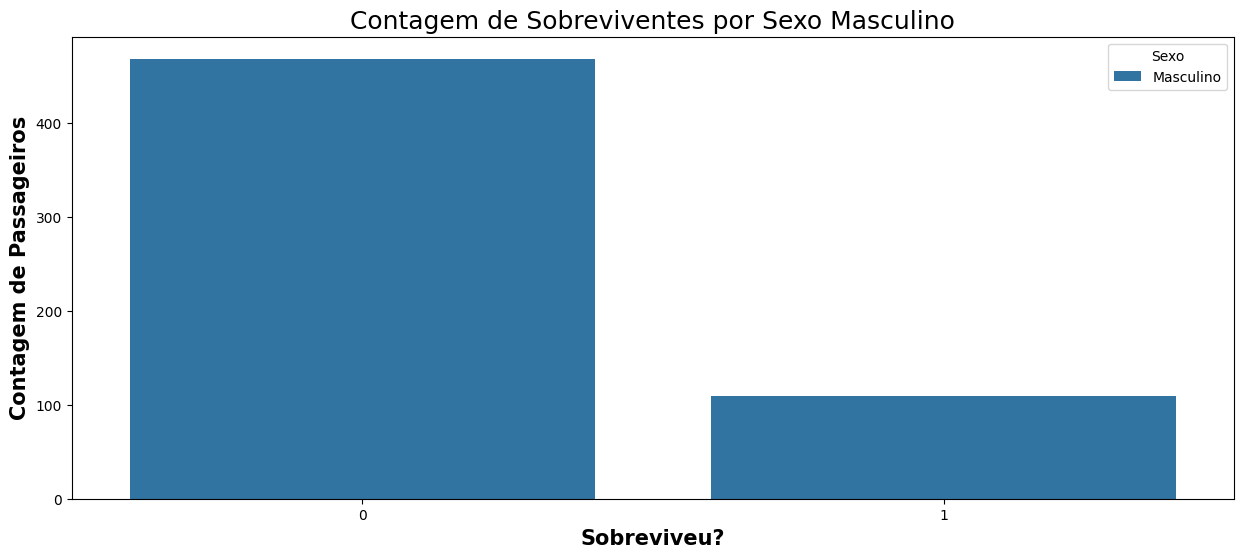

In [88]:
plt.figure(figsize=(15, 6))
sns.countplot(data=train[train["Sex"] == "male"], x="Survived", hue="Sex")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Sobreviveu?', weight = "bold", fontsize=15)
plt.ylabel('Contagem de Passageiros', weight = "bold", fontsize=15)
plt.legend(title='Sexo', loc='upper right', labels=['Masculino'])
plt.show()

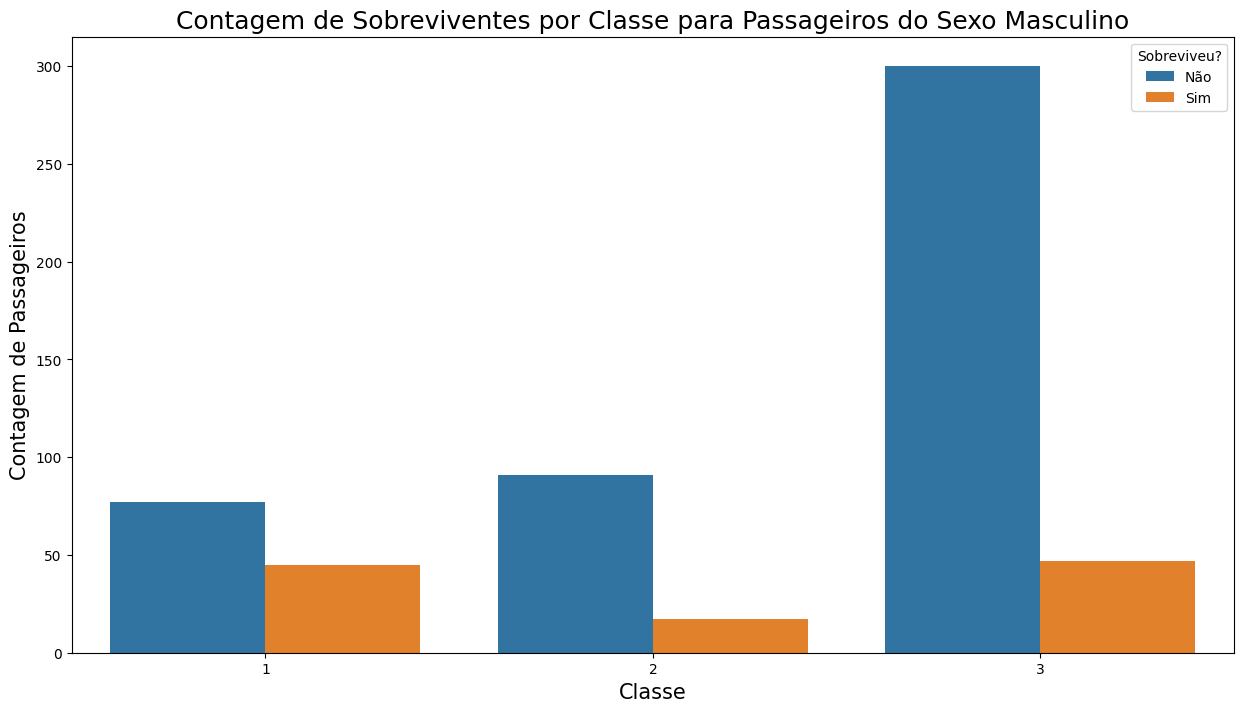

In [89]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train[train["Sex"] == "male"], x="Pclass", hue="Survived")
plt.title('Contagem de Sobreviventes por Classe para Passageiros do Sexo Masculino', fontsize=18)
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Contagem de Passageiros', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])
plt.show()

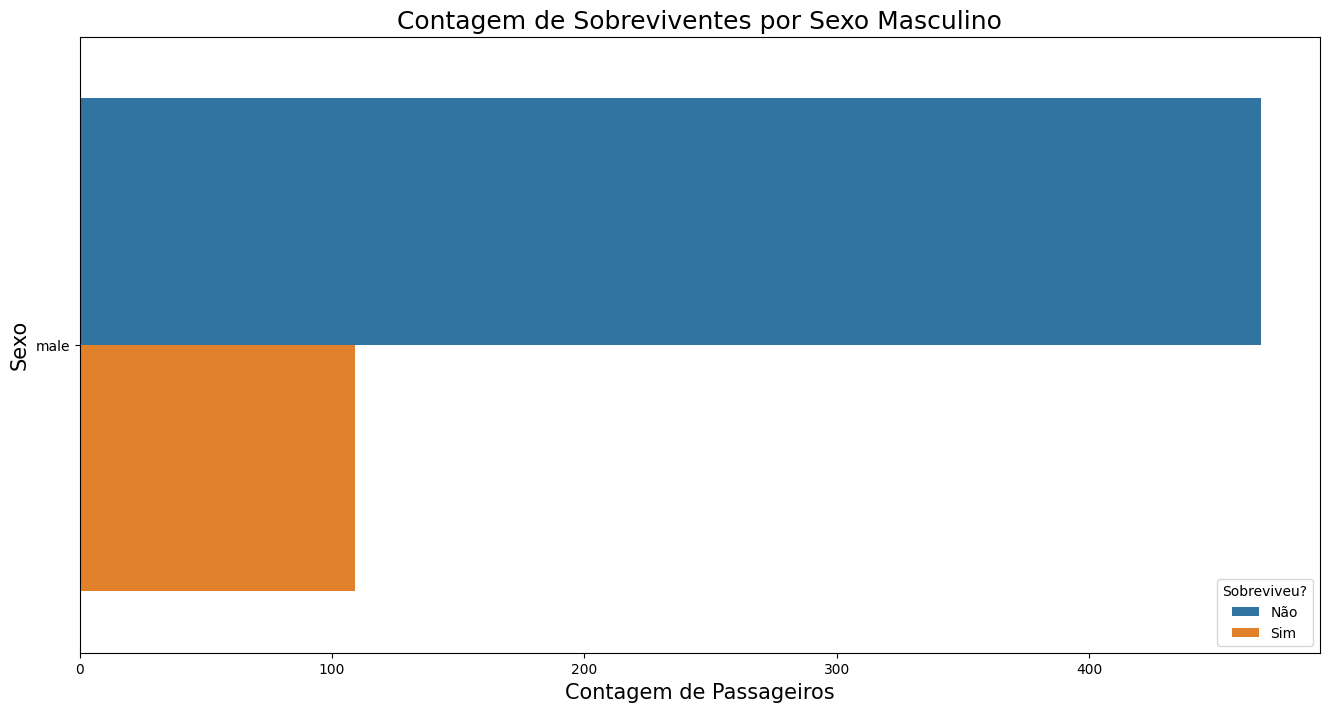

In [90]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="Sex")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Sexo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='lower right', labels=['Não', 'Sim'])

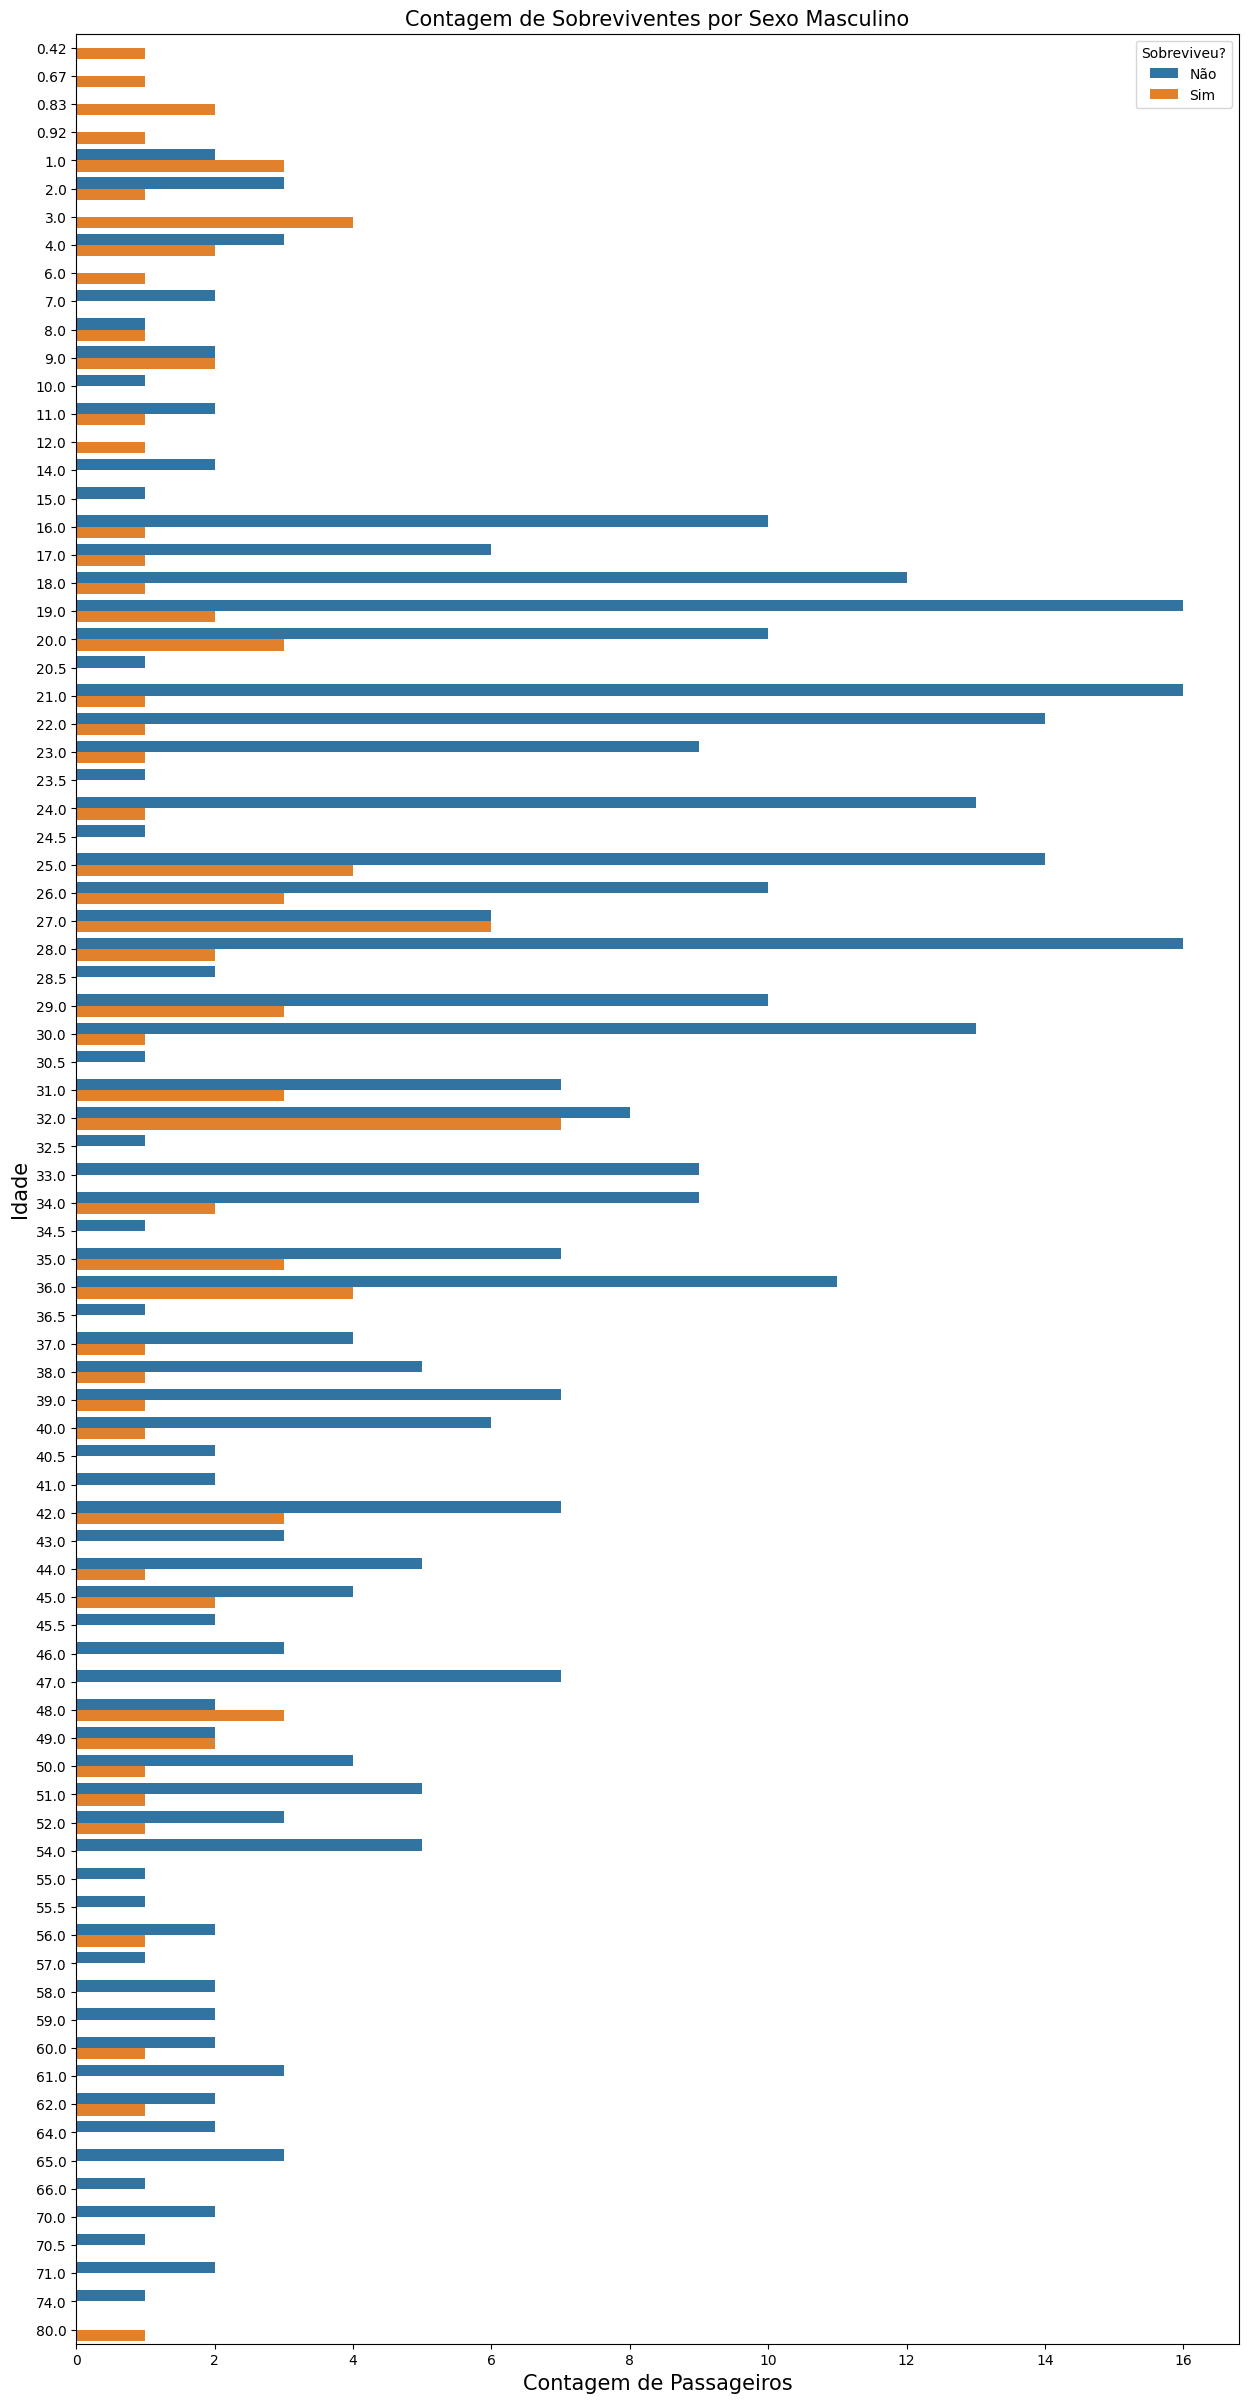

In [91]:
plt.figure(figsize=(15,30))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="Age")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=15)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Idade', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])

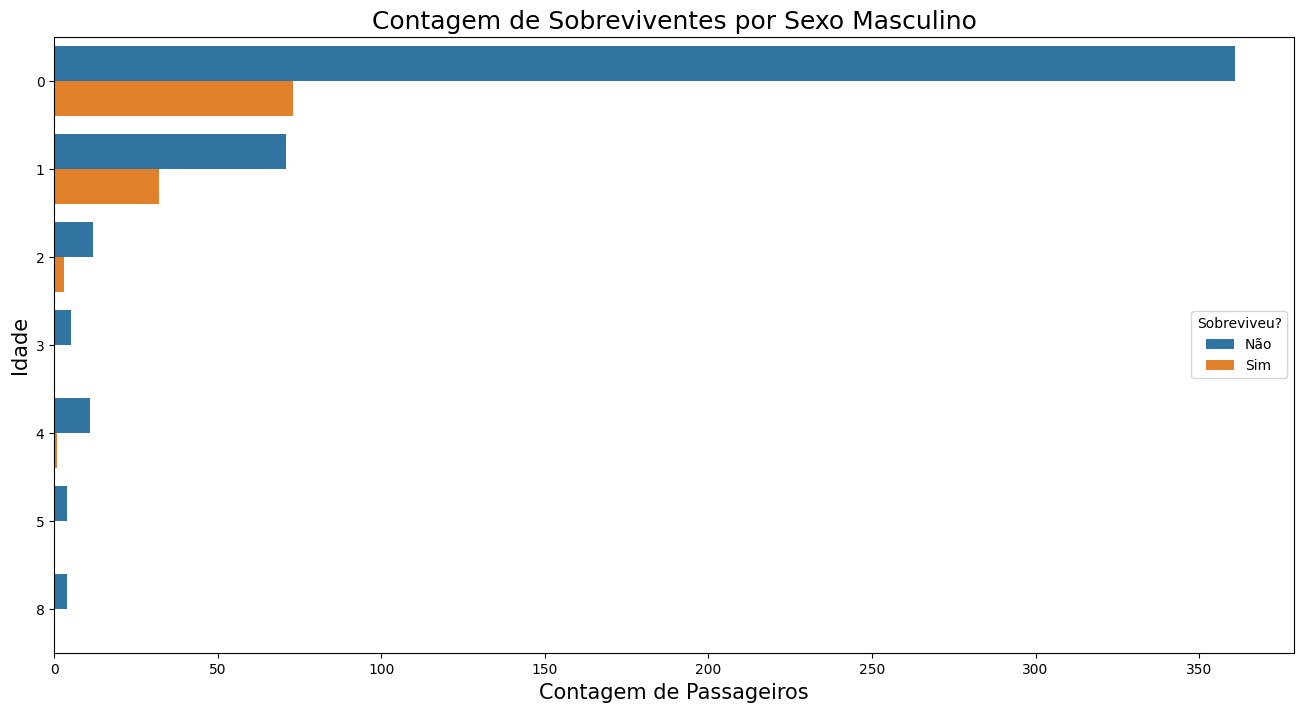

In [92]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="SibSp")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Idade', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

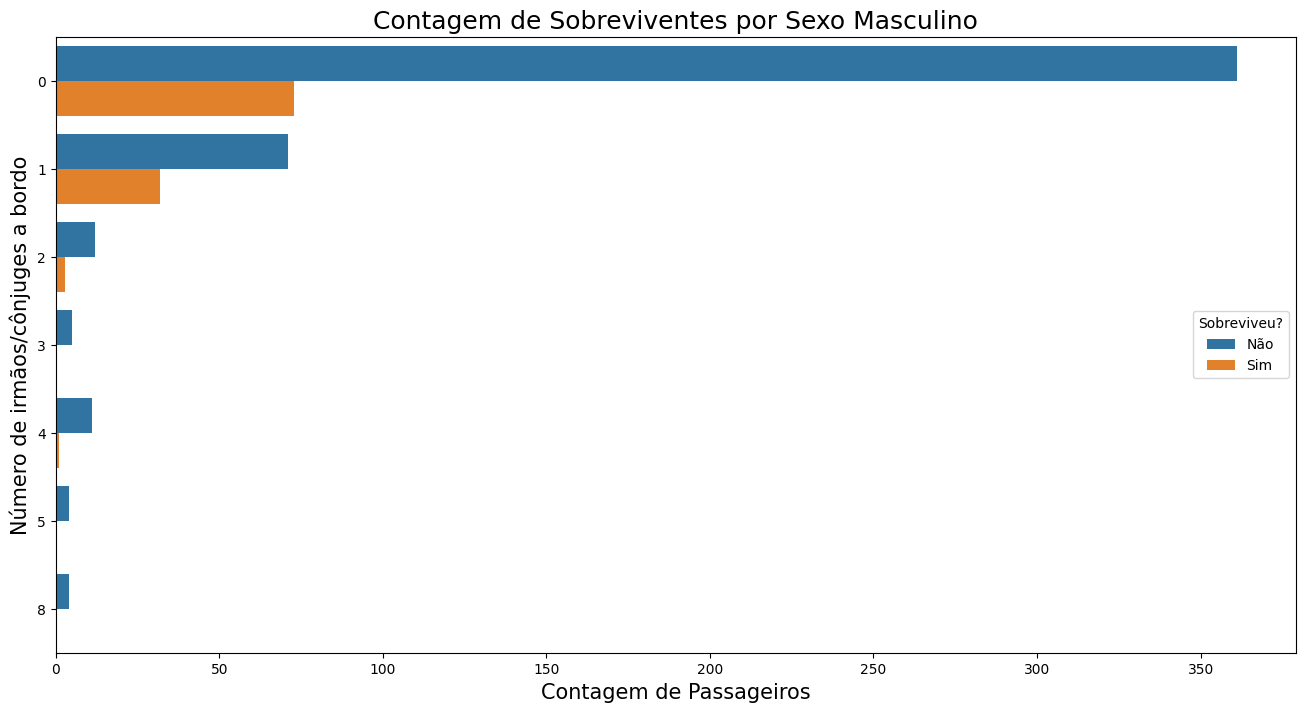

In [93]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="SibSp")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Número de irmãos/cônjuges a bordo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

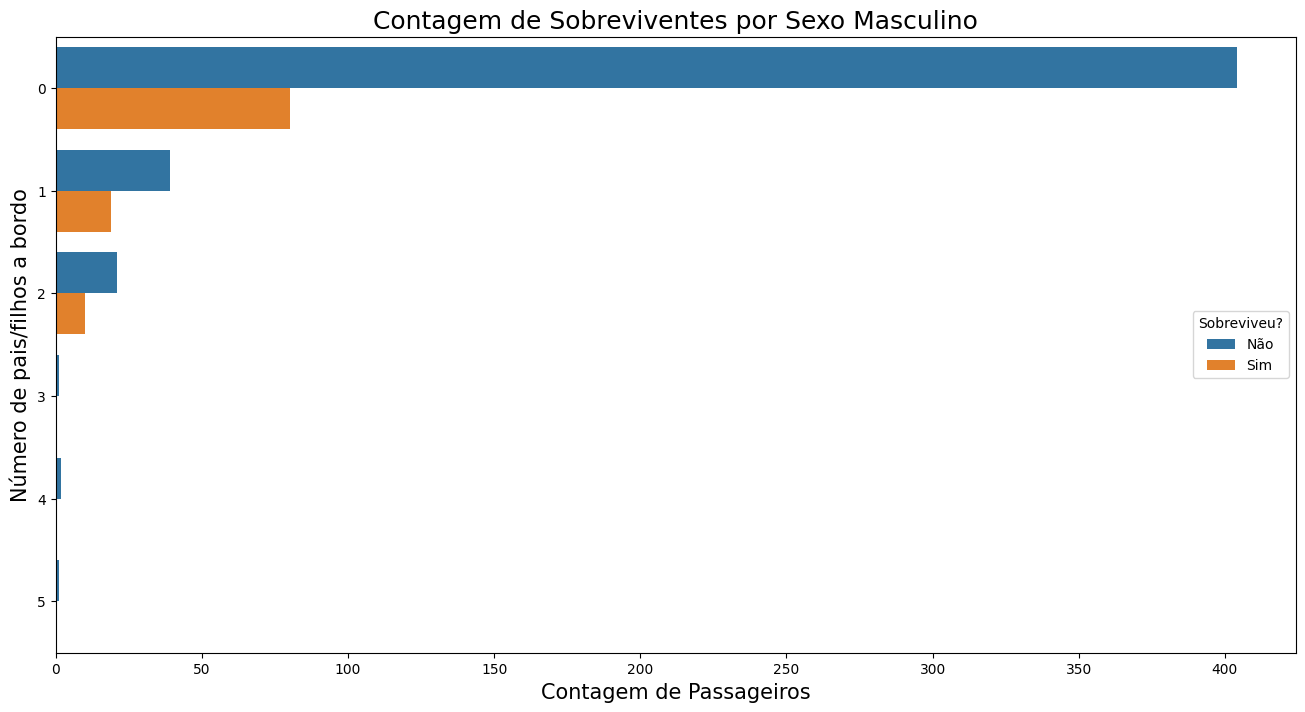

In [94]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="Parch")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Número de pais/filhos a bordo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

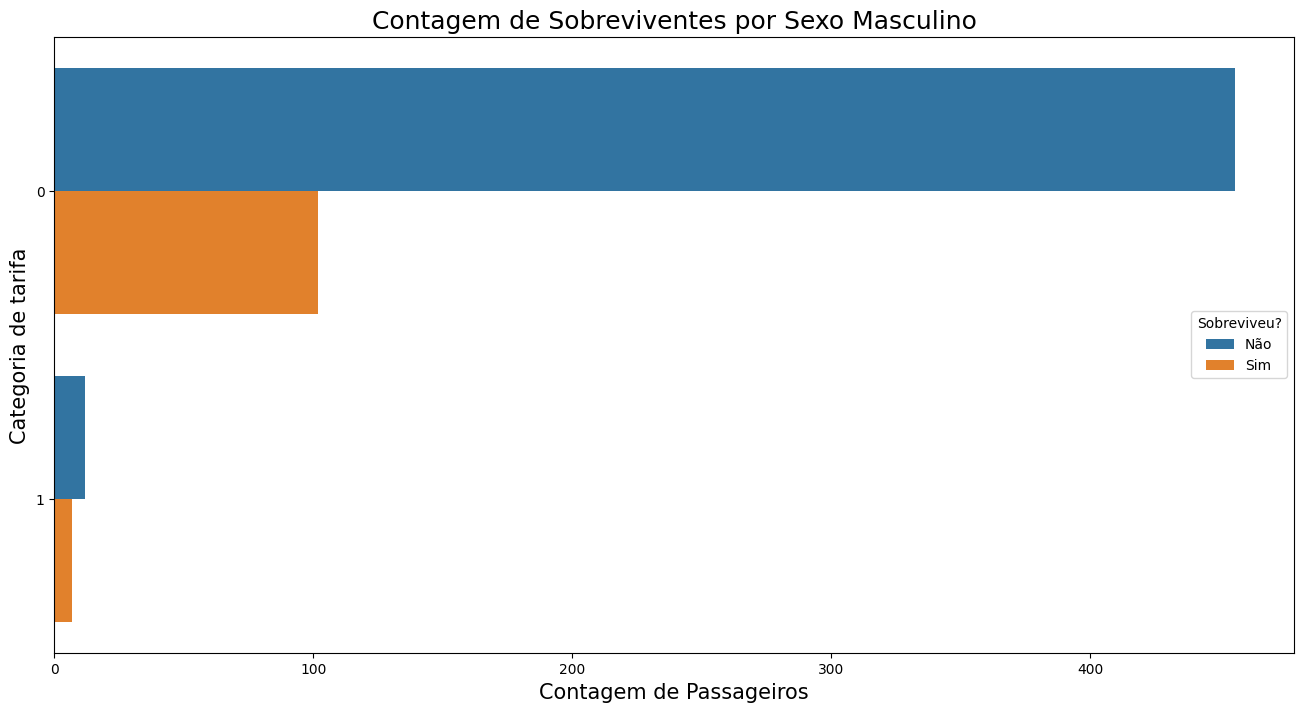

In [95]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="CategFare")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Categoria de tarifa', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

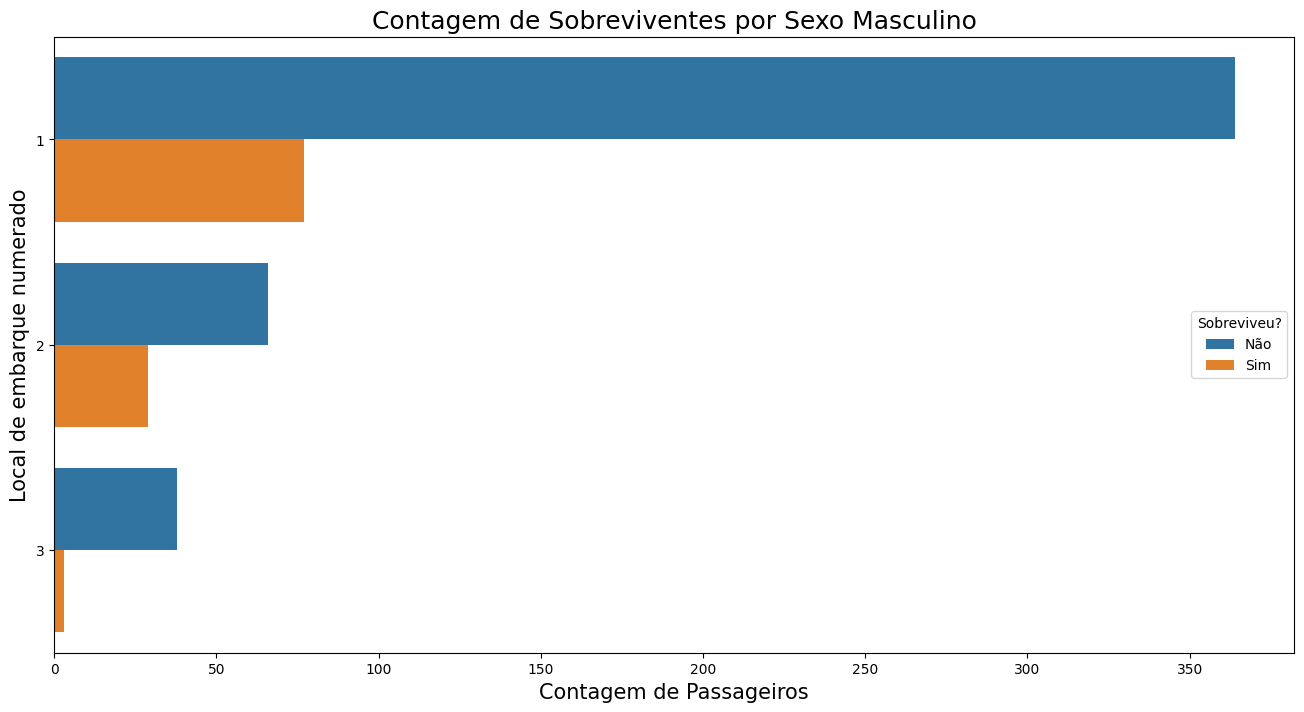

In [96]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "male"], hue="Survived",y="EmbarkedNumerico")
plt.title('Contagem de Sobreviventes por Sexo Masculino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Local de embarque numerado', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

# <font color=blue>**Gráficos - Mulheres**</font>

* No código a seguir, está sendo realizado um conjunto de visualizações utilizando a biblioteca **seaborn** no ambiente Python. Cada bloco de código gera um gráfico de contagem, representando diferentes aspectos da sobrevivência de passageiros do sexo masculino no conjunto de dados. A função **countplot** é utilizada para contar e representar as ocorrências de diferentes variáveis em relação à sobrevivência.

* Os gráficos abordam diversas perspectivas, incluindo a contagem de sobreviventes por classe, a contagem de sobreviventes por sexo masculino, a distribuição por idade, o número de irmãos/cônjuges a bordo, o número de pais/filhos a bordo, a categoria de tarifa e o local de embarque numerado. Cada gráfico é configurado com títulos descritivos, eixos rotulados e legendas para facilitar a compreensão.

* Essas visualizações fornecem insights valiosos sobre a distribuição da sobrevivência de passageiros do sexo masculino em diferentes contextos, contribuindo para uma análise mais aprofundada dos dados. Este tipo de abordagem é fundamental para a compreensão de padrões e tendências que podem impactar a tomada de decisões em análises de dados.

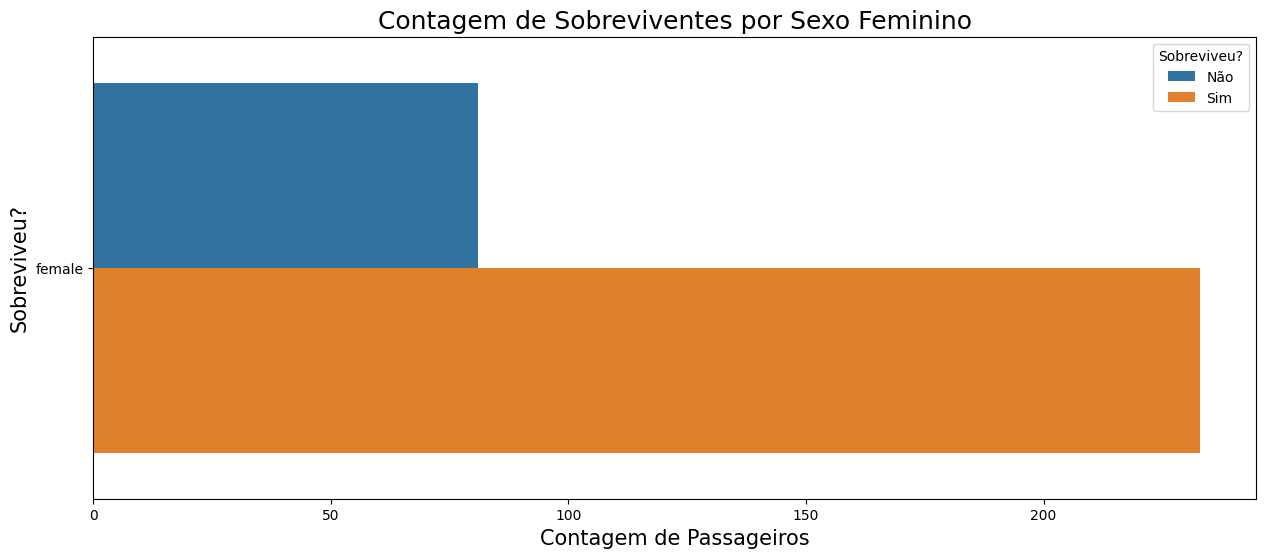

In [97]:
plt.figure(figsize=(15, 6))
sns.countplot(data=train[train["Sex"] == "female"], hue="Survived", y="Sex")
plt.title('Contagem de Sobreviventes por Sexo Feminino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Sobreviveu?', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])
plt.show()

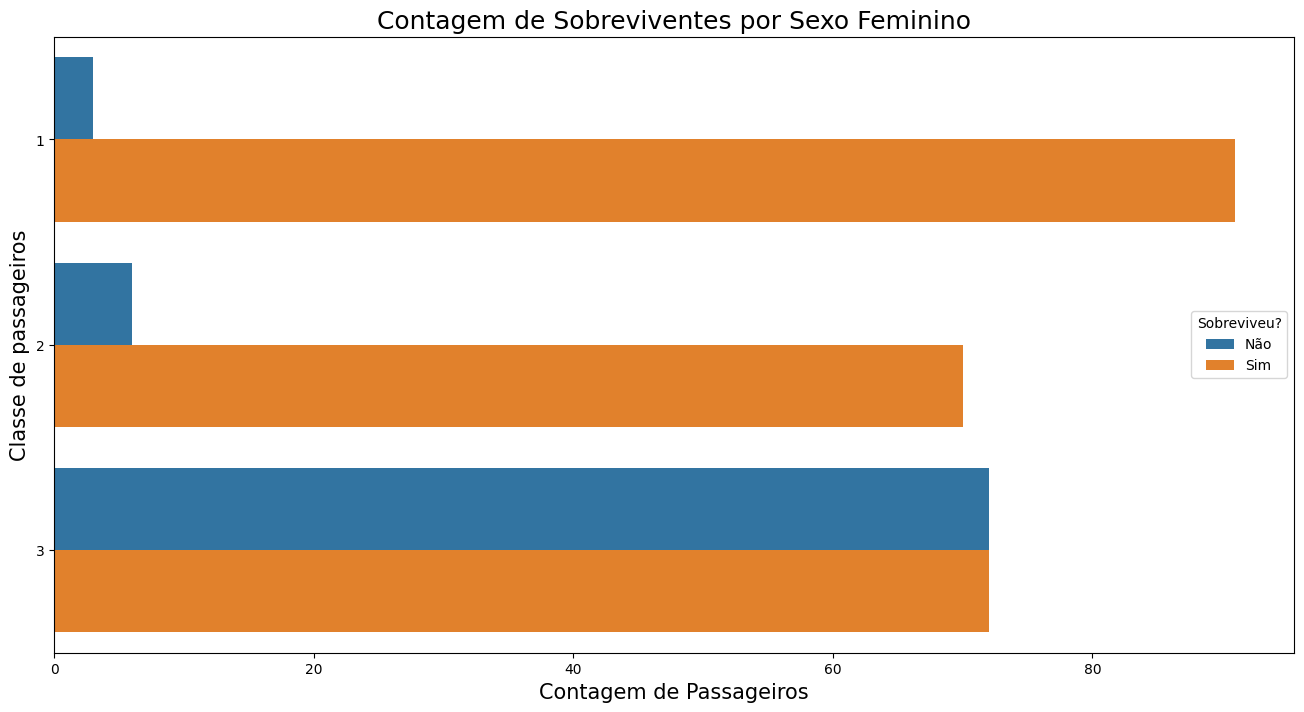

In [98]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "female"], hue="Survived",y="Pclass")
plt.title('Contagem de Sobreviventes por Sexo Feminino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Classe de passageiros', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

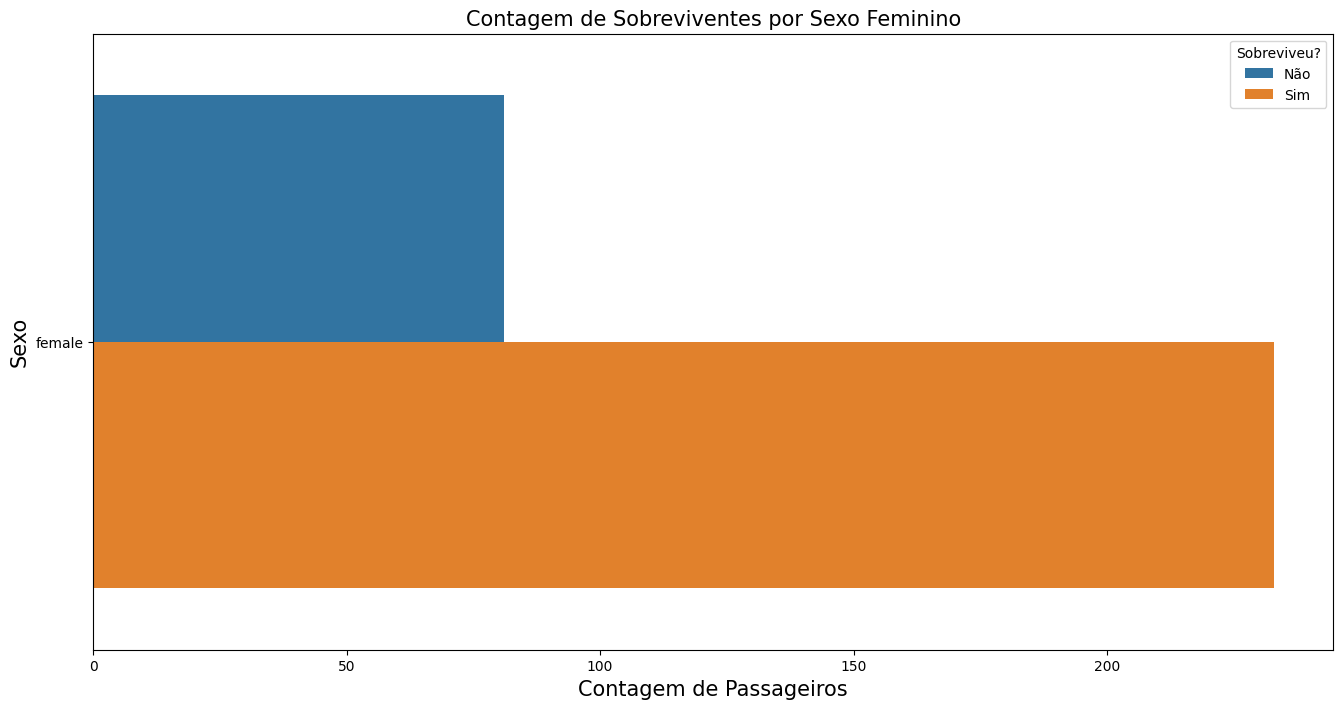

In [99]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "female"], hue="Survived",y="Sex")
plt.title('Contagem de Sobreviventes por Sexo Feminino', fontsize=15)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Sexo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])

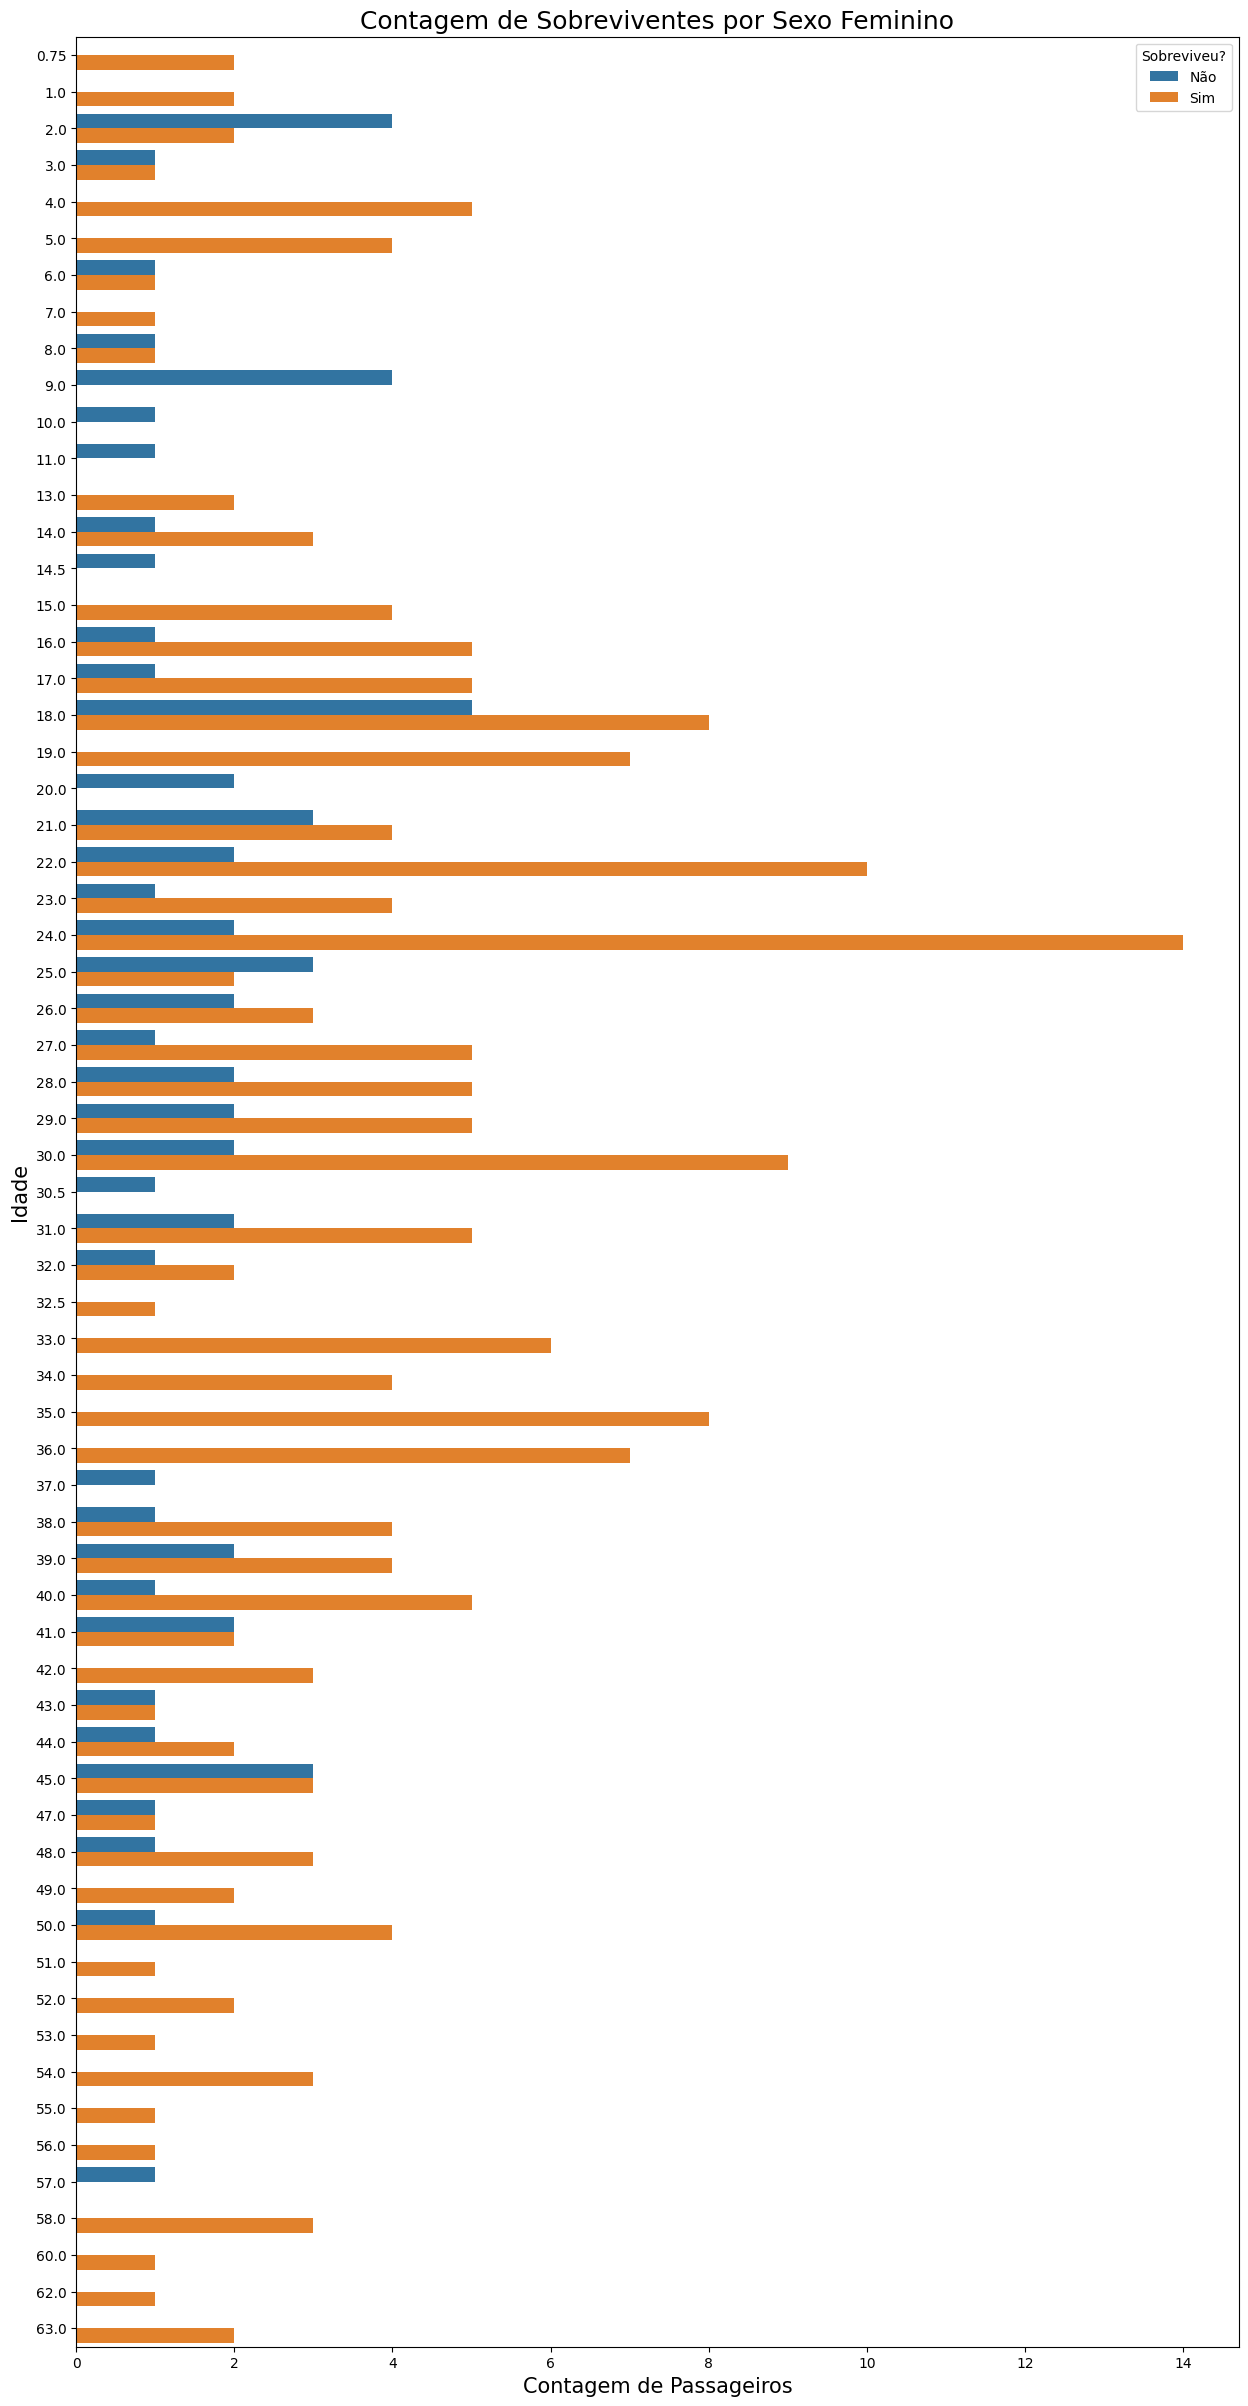

In [100]:
plt.figure(figsize=(15,30))
sns.countplot(data=train[train["Sex"] == "female"], hue="Survived",y="Age")
plt.title('Contagem de Sobreviventes por Sexo Feminino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Idade', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])

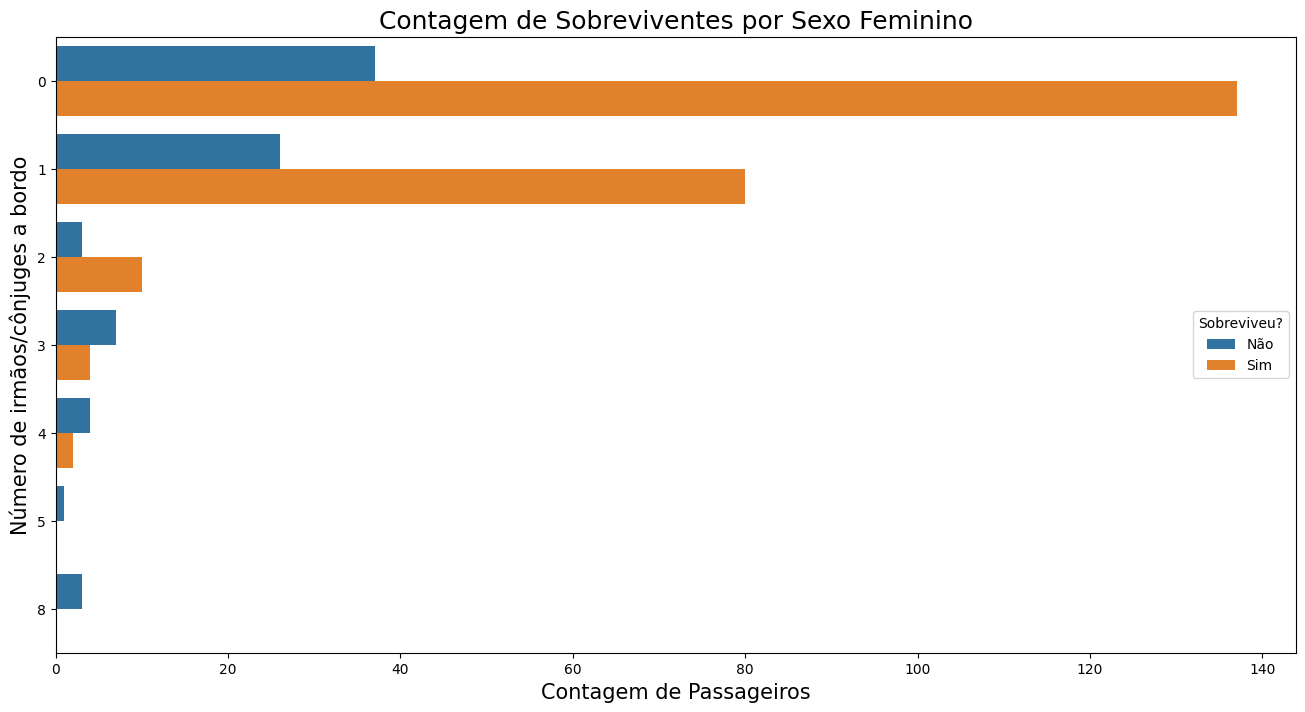

In [101]:
plt.figure(figsize=(16,8))
sns.countplot(data=train[train["Sex"] == "female"], hue="Survived",y="SibSp")
plt.title('Contagem de Sobreviventes por Sexo Feminino', fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Número de irmãos/cônjuges a bordo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

# <font color=blue>**Graficos - Geral**</font>

* No código a seguir, está sendo realizado um conjunto de visualizações utilizando a biblioteca **sns** do Python, que é parte do pacote **matplotlib**, para análise exploratória de dados. Cada bloco de código gera um gráfico de barras, representando diferentes aspectos relacionados à sobrevivência de passageiros em um dataset chamado **train**. Os gráficos incluem informações como o número de irmãos/cônjuges a bordo, grupo de idade, classe de passageiro, entre outros. A variável **Survived** é utilizada como a variável alvo, indicando se o passageiro sobreviveu ou não.

* As figuras são personalizadas com títulos informativos, eixos rotulados e legendas para facilitar a compreensão. A função **countplot** é empregada para contar e exibir a distribuição de dados categóricos. Algumas variáveis categóricas notáveis incluem **SibSpSex**, **GrupoAge**, **Pclass**, **Parch**, **SibSp**, **Age**, **Sex**, **Embarked**, e **CategFare**.

* Essa abordagem visual proporciona uma compreensão rápida e clara das relações entre diferentes variáveis e a sobrevivência dos passageiros, sendo uma técnica valiosa na análise de dados exploratória.

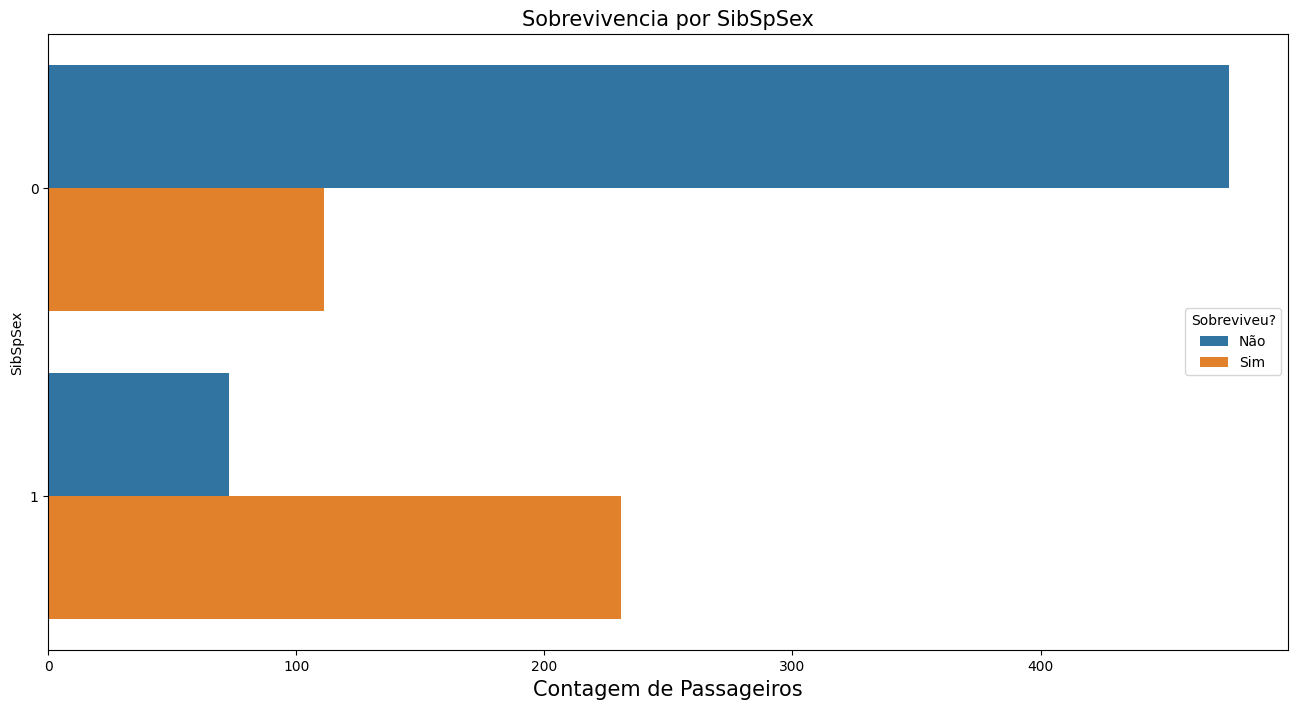

In [102]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="SibSpSex")
plt.title("Sobrevivencia por SibSpSex", fontsize=15)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

Text(0, 0.5, 'Local de Embarque')

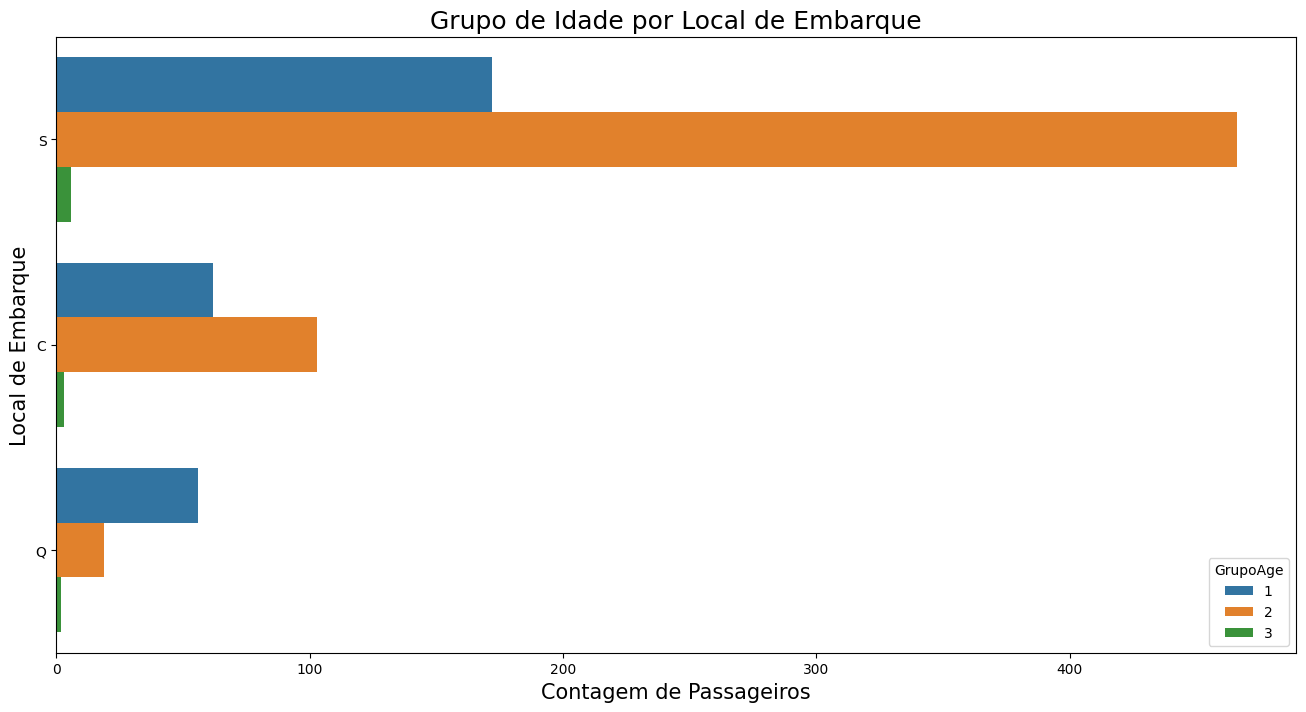

In [104]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="GrupoAge",y="Embarked")
plt.title("Grupo de Idade por Local de Embarque", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Local de Embarque', fontsize=15)

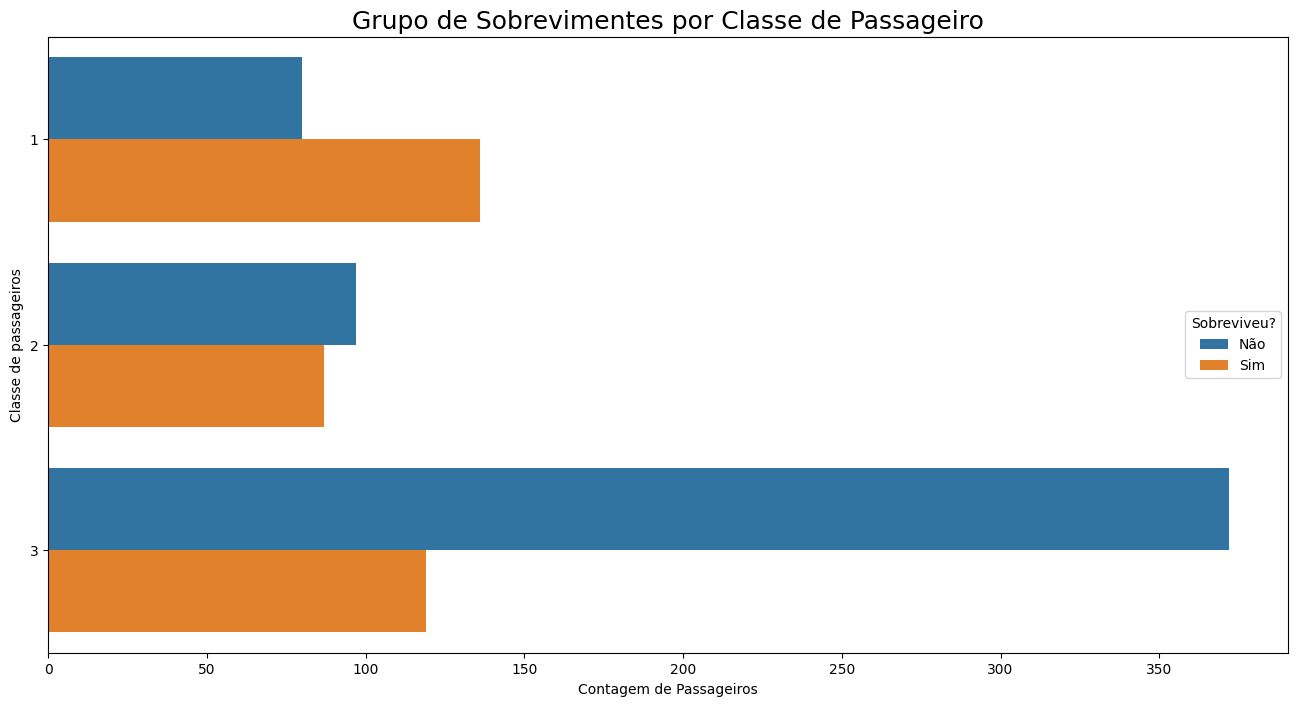

In [105]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="Pclass")
plt.title("Grupo de Sobrevimentes por Classe de Passageiro", fontsize=18)
plt.xlabel('Contagem de Passageiros')
plt.ylabel('Classe de passageiros')
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

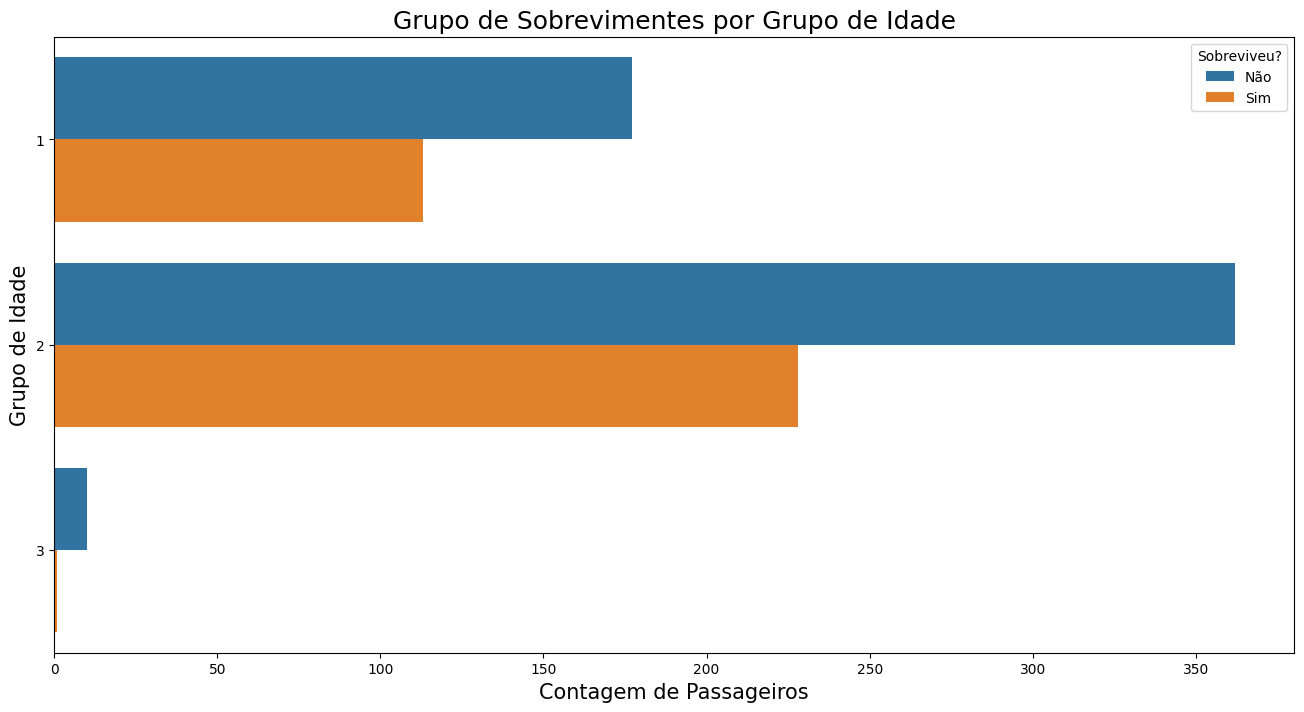

In [106]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="GrupoAge")
plt.title("Grupo de Sobrevimentes por Grupo de Idade", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Grupo de Idade', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])

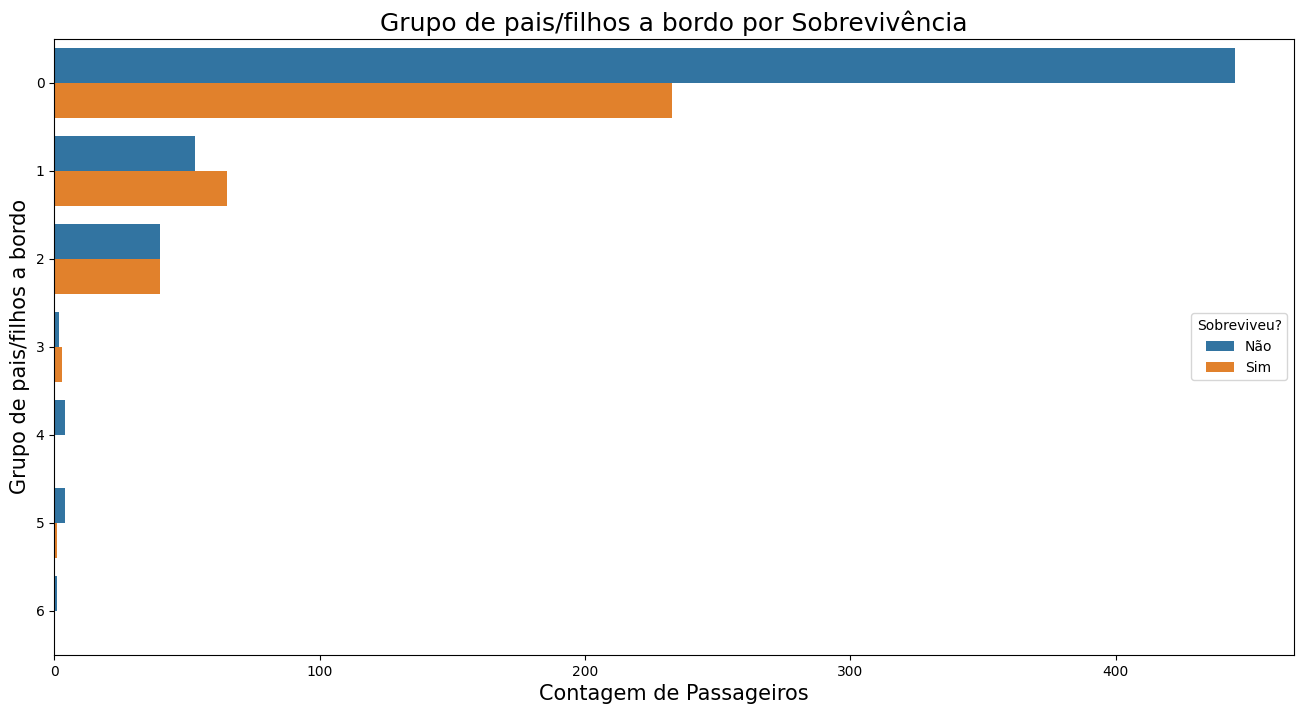

In [107]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="Parch")
plt.title("Grupo de pais/filhos a bordo por Sobrevivência", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Grupo de pais/filhos a bordo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

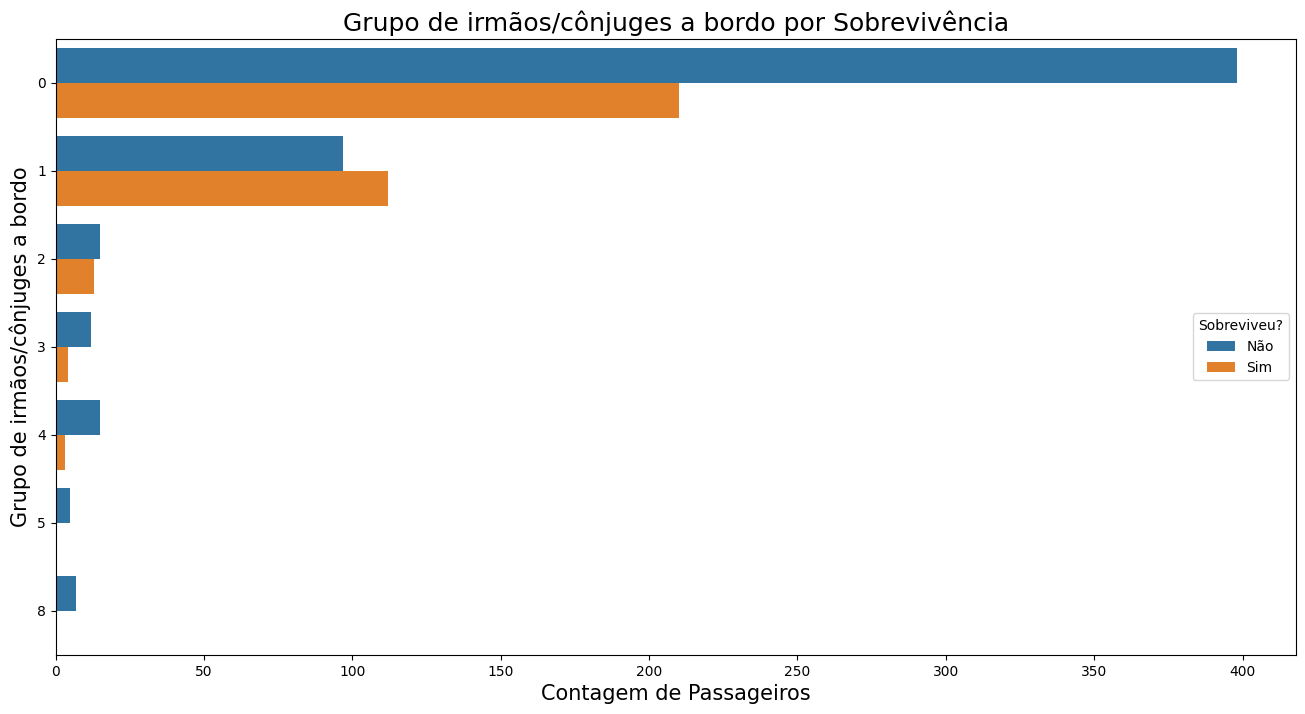

In [108]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="SibSp")
plt.title("Grupo de irmãos/cônjuges a bordo por Sobrevivência", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Grupo de irmãos/cônjuges a bordo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

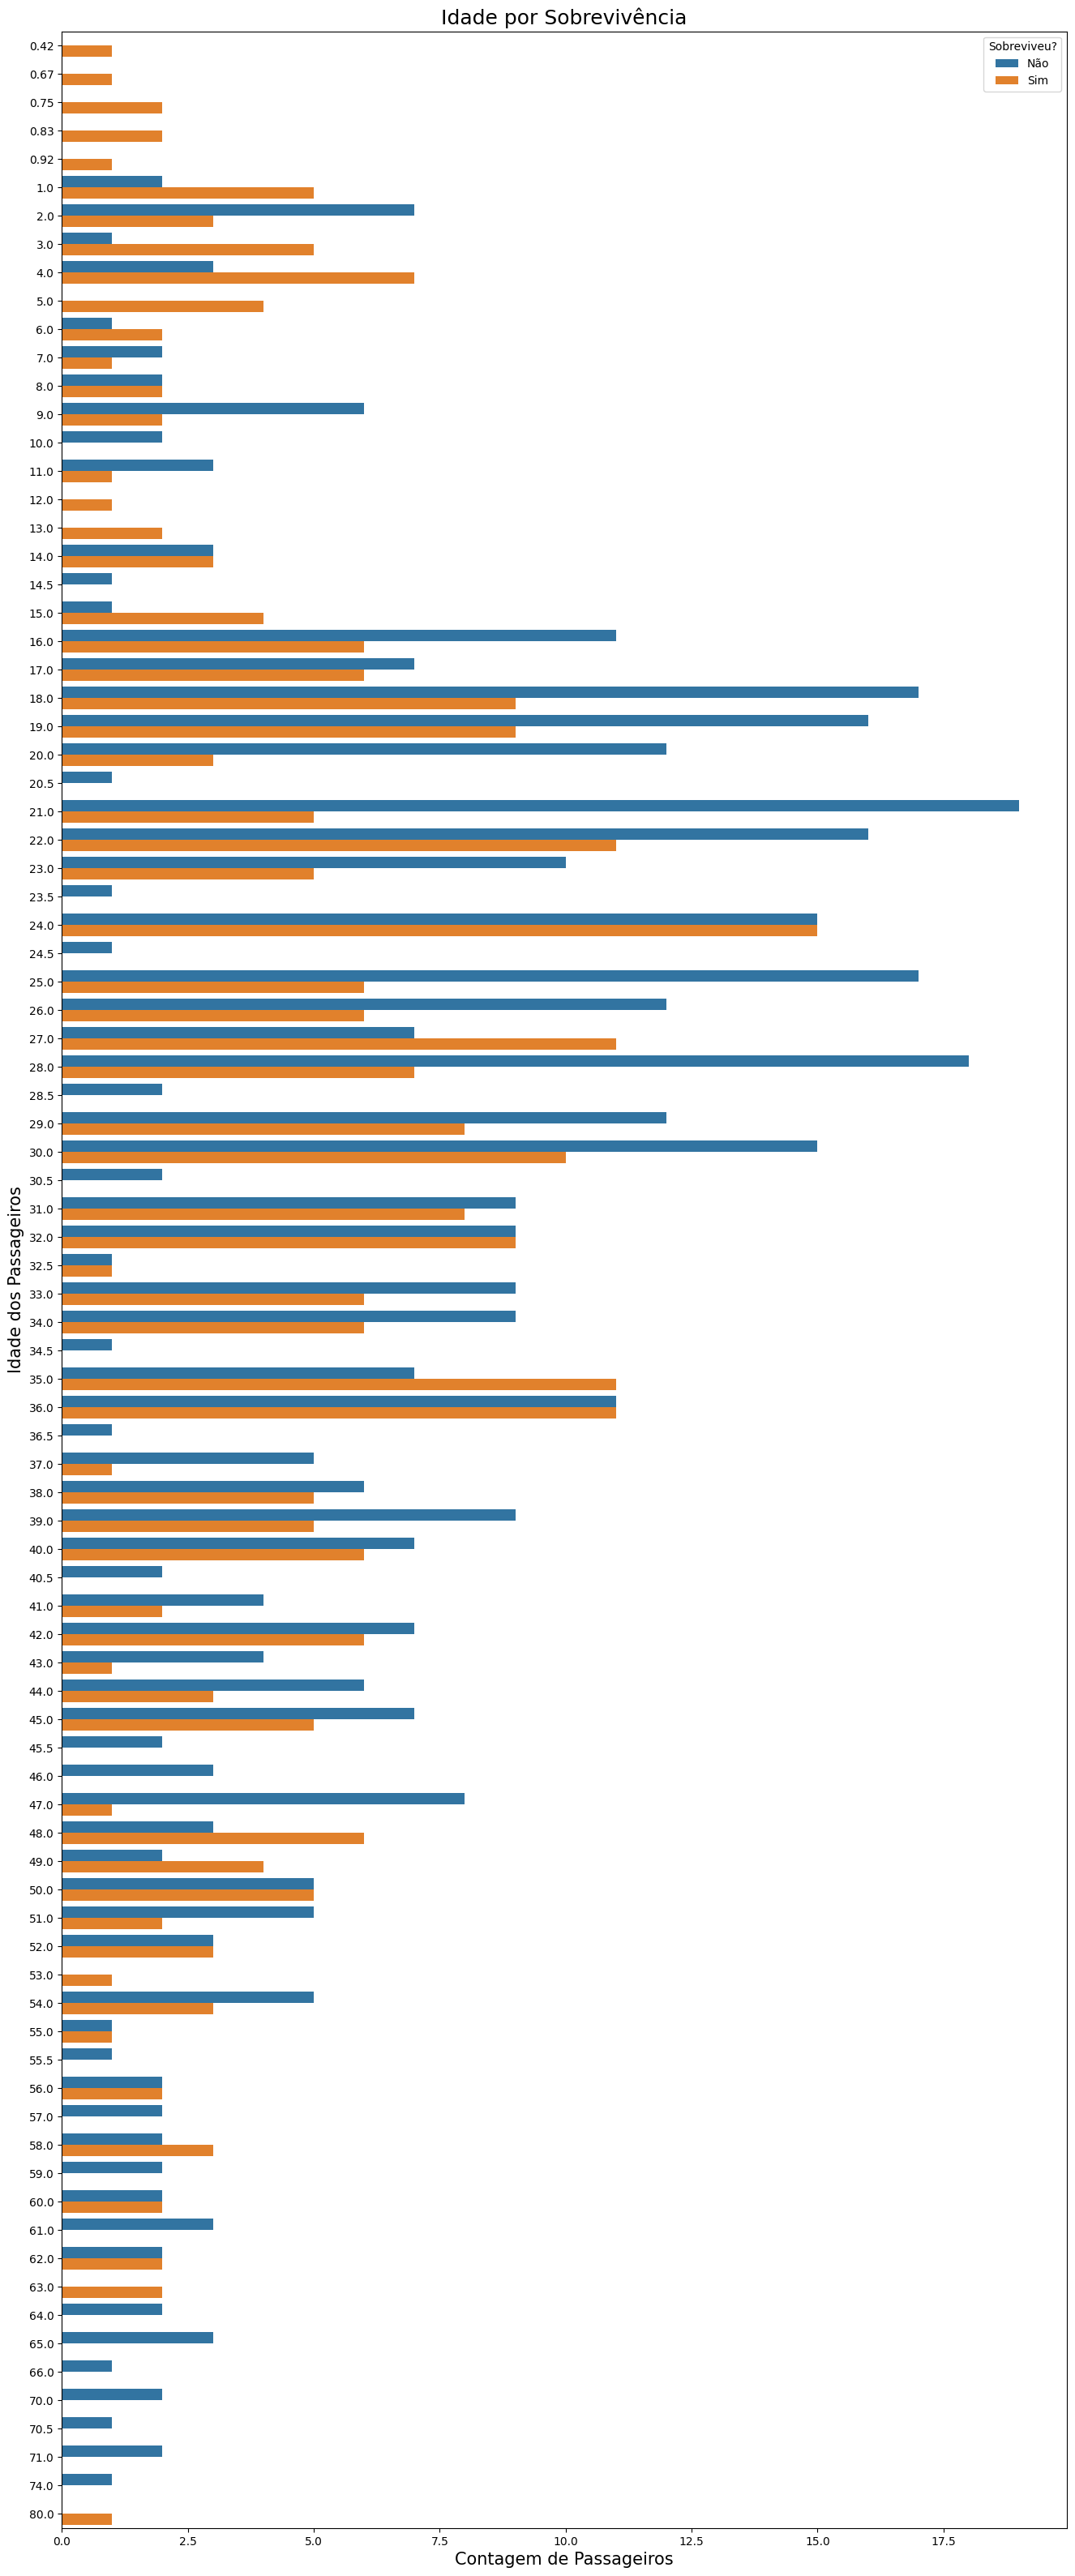

In [112]:
plt.figure(figsize=(16,40))
sns.countplot(data=train, hue="Survived",y="Age")
plt.title("Idade por Sobrevivência", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Idade dos Passageiros', fontsize=15)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])

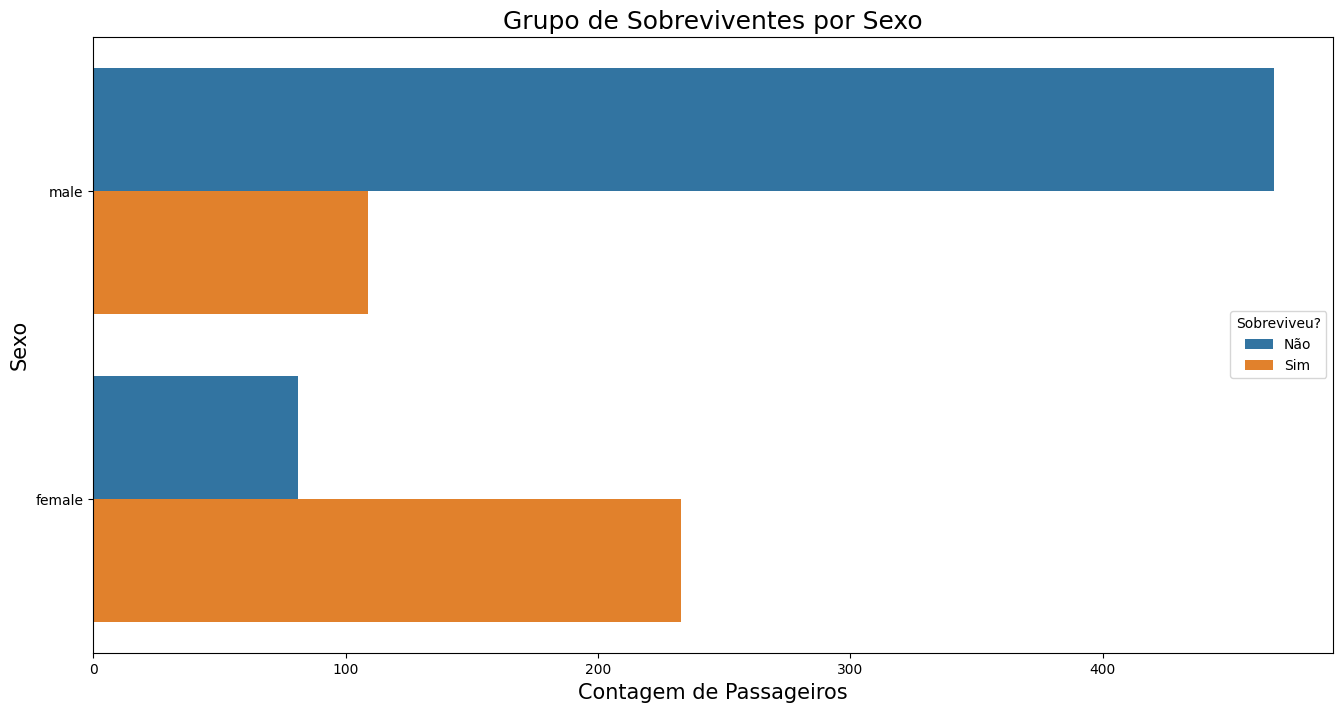

In [113]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="Sex")
plt.title("Grupo de Sobreviventes por Sexo", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Sexo', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

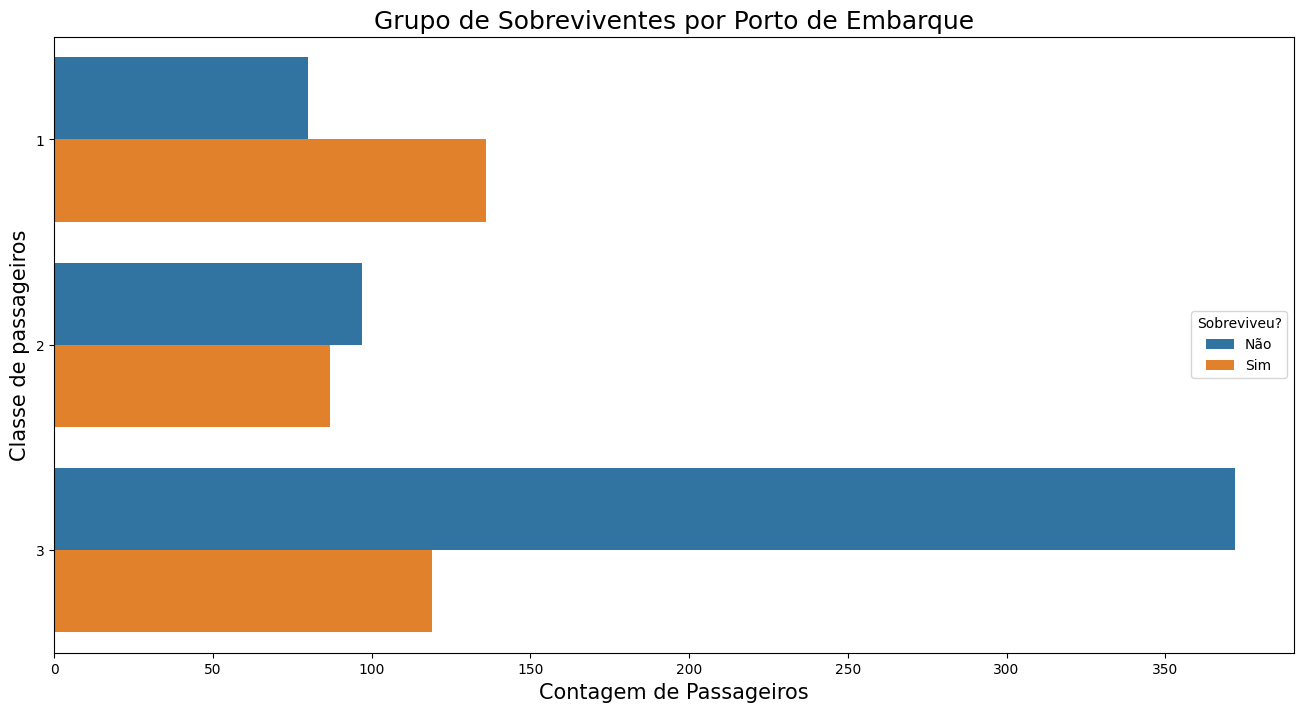

In [114]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="Pclass")
plt.title("Grupo de Sobreviventes por Porto de Embarque", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Classe de passageiros', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

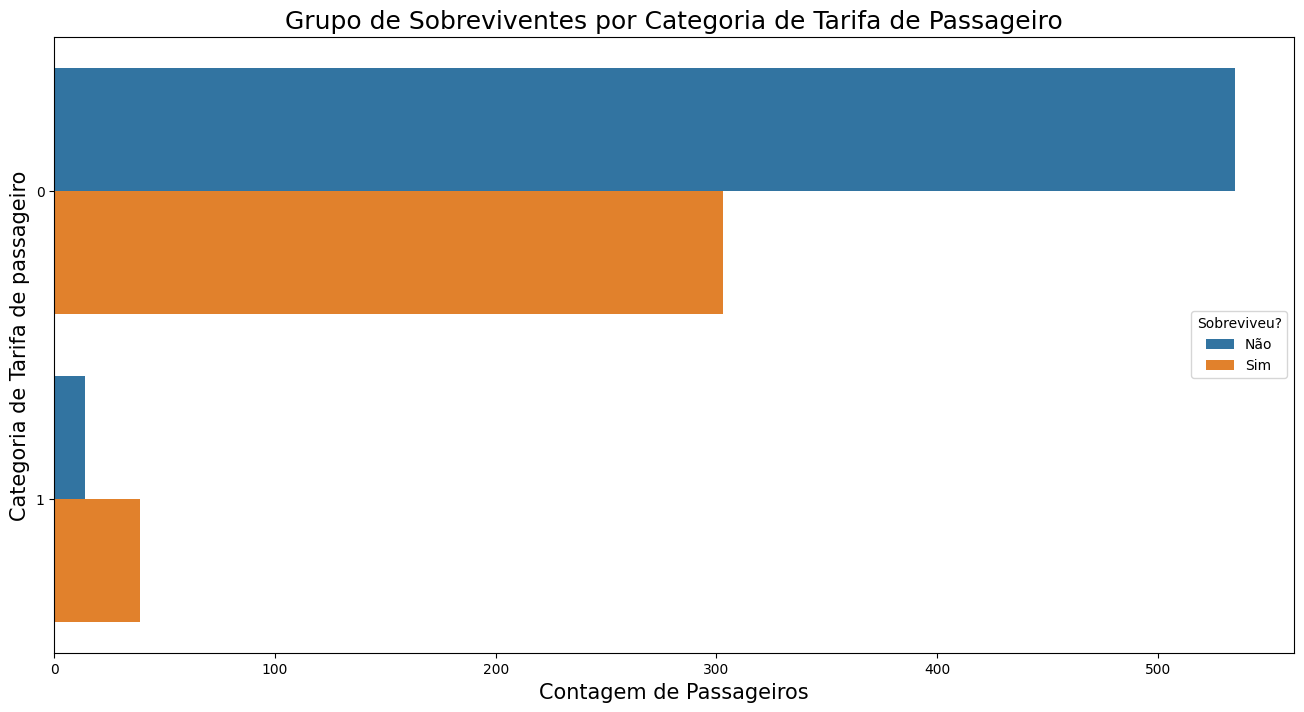

In [115]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, hue="Survived",y="CategFare")
plt.title("Grupo de Sobreviventes por Categoria de Tarifa de Passageiro", fontsize=18)
plt.xlabel('Contagem de Passageiros', fontsize=15)
plt.ylabel('Categoria de Tarifa de passageiro', fontsize=15)
plt.legend(title='Sobreviveu?', loc='center right', labels=['Não', 'Sim'])

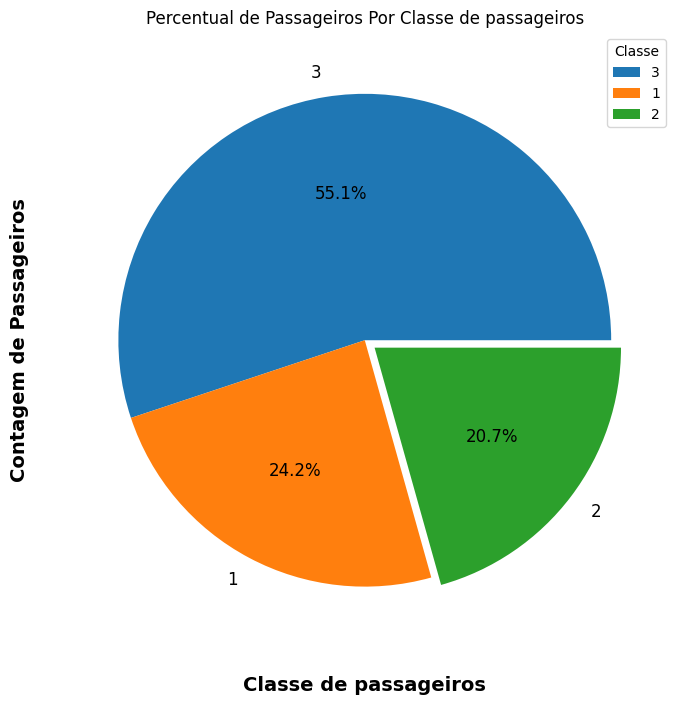

In [39]:
pclass_counts=train['Pclass'].value_counts()
plt.figure(figsize = (20, 8))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Percentual de Passageiros Por Classe de passageiros')
plt.xlabel('Classe de passageiros', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Contagem de Passageiros', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(title='Classe', labels = pclass_counts.index, loc = "best")

plt.show()

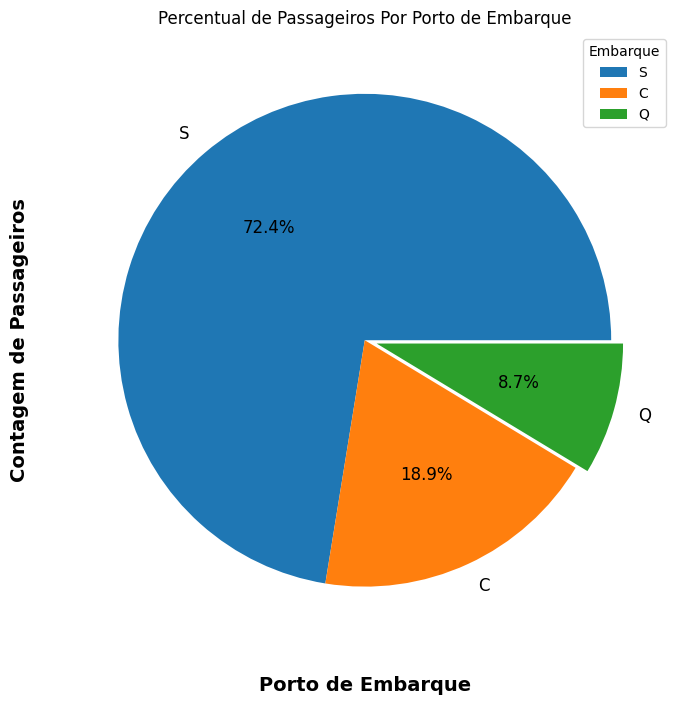

In [124]:
Embarked_counts=train['Embarked'].value_counts()
plt.figure(figsize = (20, 8))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Percentual de Passageiros Por Porto de Embarque')
plt.xlabel('Porto de Embarque', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Contagem de Passageiros', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(title='Embarque',labels = Embarked_counts.index, loc = "best")
plt.show()

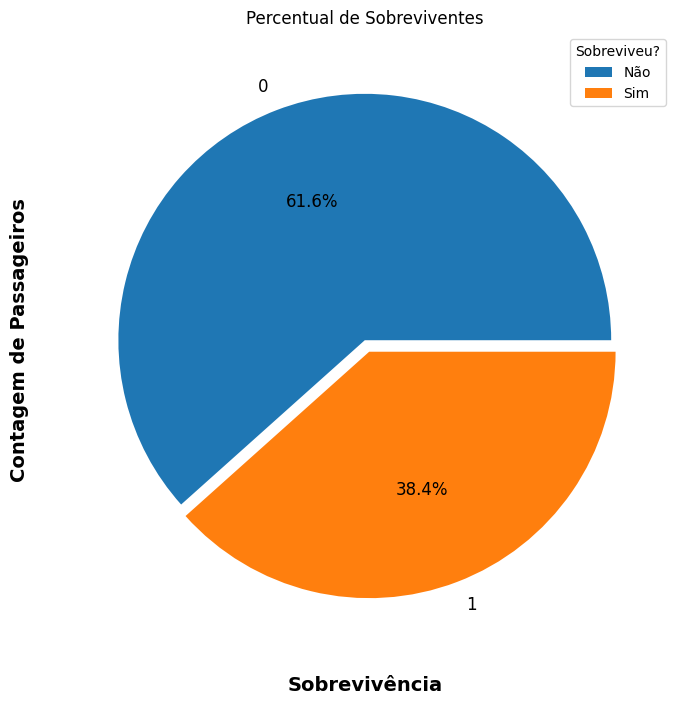

In [125]:
Survived_counts=train['Survived'].value_counts()
plt.figure(figsize = (20, 8))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Percentual de Sobreviventes')
plt.xlabel('Sobrevivência', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Contagem de Passageiros', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(title='Sobreviveu?', loc='upper right', labels=['Não', 'Sim'])
plt.show()

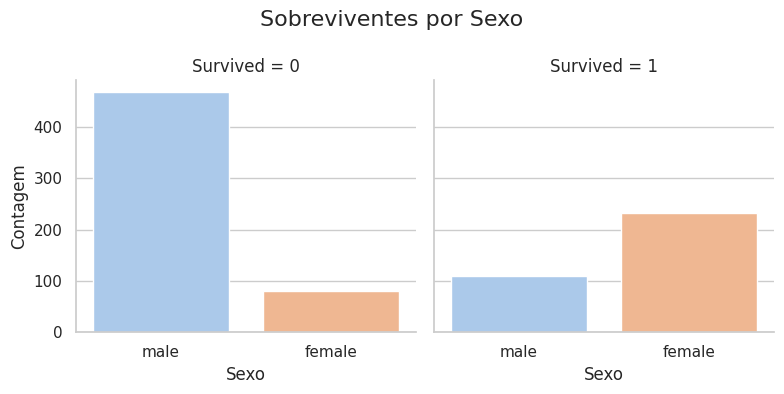

In [131]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o FacetGrid
g = sns.FacetGrid(train, col='Survived', height=4, aspect=1)

# Especificar a ordem das categorias
order = train['Sex'].unique()  # Obtém a ordem das categorias únicas
g.map(sns.countplot, 'Sex', order=order, palette='pastel')

# Adicionar títulos aos eixos
g.set_axis_labels("Sexo", "Contagem")

# Adicionar um título
g.fig.suptitle('Sobreviventes por Sexo', size=16)

# Ajustar o layout
plt.tight_layout()
plt.show()

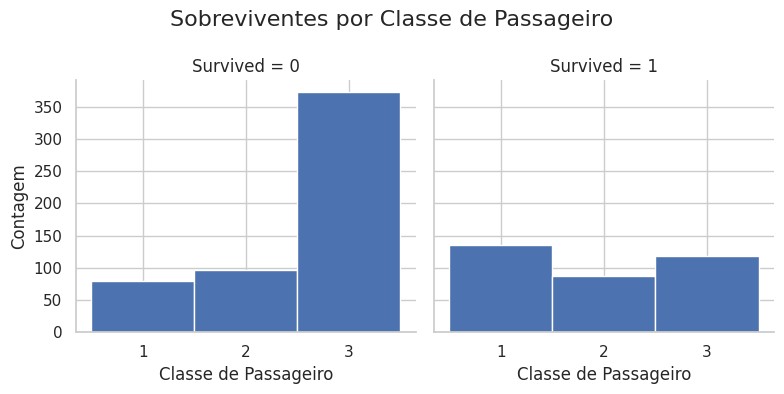

In [135]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o FacetGrid
g = sns.FacetGrid(train, col='Survived', height=4, aspect=1)

# Especificar a ordem das categorias
order = [1, 2, 3]

# Mapear o histograma para a classe de passageiro (<link>Pclass</link>)
g.map(plt.hist, 'Pclass', bins=3, range=(0.5, 3.5), align='mid')

# Definir os rótulos dos eixos x e y
g.set_axis_labels("Classe de Passageiro", "Contagem")

# Definir os rótulos do eixo x
plt.xticks(order)

# Adicionar um título
g.fig.suptitle('Sobreviventes por Classe de Passageiro', size=16)

# Ajustar o layout
plt.tight_layout()
plt.show()

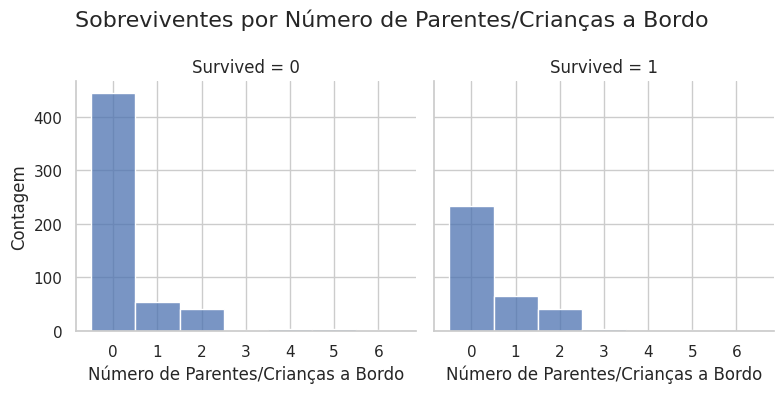

In [142]:
# Calcular a contagem de ocorrências de Parch
parch_counts = train['Parch'].value_counts()

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o FacetGrid
g = sns.FacetGrid(train, col='Survived', height=4, aspect=1)

# Mapear o histograma para o número de parentes/crianças a bordo (Parch)
g.map(sns.histplot, 'Parch', bins=len(parch_counts), discrete=True)

# Definir os rótulos dos eixos x e y
g.set_axis_labels("Número de Parentes/Crianças a Bordo", "Contagem")

# Definir os rótulos do eixo x
plt.xticks(parch_counts.index)

# Adicionar um título
g.fig.suptitle('Sobreviventes por Número de Parentes/Crianças a Bordo', size=16)

# Ajustar o layout
plt.tight_layout()
plt.show()

# <font color=blue>**Definindo modelo e variáveis de treino**</font>

Agora que temos as colunas com as variáveis desejadas, precisamos organiza-las em 2 variáveis, sendo uma delas para o treinamento, e a outra com as respostas desse treinamento. Dessa forma, o modelo que iremos criar terá uma base de como deve se parecer certos dados para que eles resultem em certas respostas

In [222]:
x_train = train[variaveis]
y_train = train["Survived"]
x_prev = test[variaveis]

Como convenção, utilizamos a variável X para designar os dados para o calculo, y para designar as respostas corretas para esses calculos. X_prev age como a variável dos dados do arquivo de teste, o qual vamos ter que descobrir, por meio do machine learning, quais os resultados corretos.
Vale ressaltar também que, algumas entradas relacionadas a idade (age) ainda precisam ser tratadas, uma vez que apresentam campos NaN. Faremos isso a seguir

In [223]:
x_train = x_train.fillna(-1)
x_prev = x_prev.fillna(-1)

# <font color=blue>**Treinando o Modelo**</font>

Agora finalmente chegou a hora de treinar o modelo, em breve teremos um csv "quentinho" pra submissão

### ***1-Regressão Logística***

* No código a seguir, está sendo realizado o treinamento de um modelo utilizando a biblioteca **titanic_model**. O método **fit** é empregado para ajustar o modelo aos dados de entrada (**X**) e saída (**y**). Esse comando é crucial para que o modelo aprenda os padrões presentes nos dados e esteja preparado para fazer previsões.

In [225]:
titanic_model_forest = RandomForestClassifier(n_estimators=100,n_jobs=1,random_state=0)
titanic_model_forest.fit(x_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=0)

* No código a seguir, está sendo utilizado o método `score` em um modelo relacionado ao Titanic, provavelmente um modelo de aprendizado de máquina. Esse método compara as previsões do modelo para o conjunto de treinamento (`x_train`) com as labels reais (`y_train`). O prefixo `titanic_model_forest` sugere que se trata de um modelo baseado em floresta (random forest) aplicado ao conjunto de dados do Titanic. A função `score` avalia a precisão do modelo, indicando a proporção de previsões corretas. Essa métrica é fundamental para avaliar o desempenho do modelo durante o treinamento. Certifique-se de ter importado a biblioteca apropriada para utilizar as funções e métodos mencionados no código, como o `RandomForestClassifier` para construir o modelo preditivo.

In [230]:
titanic_model_forest.score(x_train,y_train)

0.7934904601571269

* No código a seguir, está sendo realizado um processo de previsão utilizando um modelo treinado chamado **titanic_model_forest** em um conjunto de dados de treinamento (**x_train**). A função **predict** é empregada para gerar as previsões, que são armazenadas na variável **y_pred**. Em seguida, é exibida a acurácia do modelo usando a função **accuracy_score**, comparando as previsões (**y_pred**) com as respostas reais (**y_train**). Esse código é valioso para avaliar o desempenho do modelo em relação aos dados de treinamento, fornecendo uma métrica de precisão. A compreensão do código é essencial para ajustes e melhorias no modelo, caso necessário.

In [231]:
y_pred = titanic_model_forest.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.7934904601571269


* No código a seguir, está sendo utilizado o método `ConfusionMatrixDisplay.from_predictions(y_train, y_pred)` para criar uma representação visual da matriz de confusão a partir das previsões `y_pred` e rótulos reais `y_train`. A matriz de confusão é uma ferramenta essencial na avaliação de modelos de classificação, fornecendo uma visão detalhada do desempenho em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. Em seguida, é empregada a função `print(confusion_matrix(y_train, y_pred))` para exibir a matriz de confusão em formato tabular. Vale destacar que as bibliotecas utilizadas para essas operações não foram explicitamente mencionadas no código fornecido, mas é comum que o código anterior envolva bibliotecas como **scikit-learn** para manipulação de dados e avaliação de modelos de machine learning.

[[476  73]
 [111 231]]


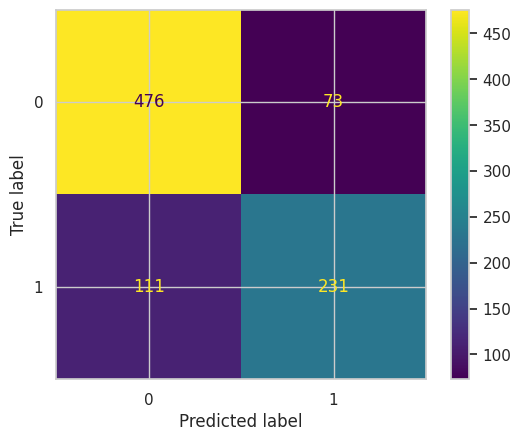

In [232]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
print(confusion_matrix(y_train, y_pred))

Modelo treinado!<br>
Vamos agora predizer X_prev

* No código a seguir, está sendo realizado um processo de previsão utilizando um modelo denominado `titanic_model`. A variável `X_prev` contém os dados de entrada para a previsão. A função **predict** é aplicada ao modelo, resultando na variável `forecast`, que representa as predições geradas. Em seguida, essas previsões são exibidas utilizando a função **display**. Esse trecho de código é útil para visualizar as saídas previstas pelo modelo treinado no contexto do conjunto de dados do Titanic.

In [217]:
forecast = titanic_model_forest.predict(X_prev)
display(forecast)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

O gigantesco array visto ai encima é o resultado da predição. Para submeter ao kaggle, precisamos formata-lo, de modo que o mesmo faça parte de uma coluna, chamada de "Survived", juntamente com o "PassengerId" como index

### ***2-Árvore de decisão***

In [218]:
titanicModelDecTree=DecisionTreeClassifier()
titanicModelDecTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [219]:
titanicModelDecTree.score(X_train,y_train)

0.7949438202247191

In [220]:
y_pred_1=titanicModelDecTree.predict(X_train)
print(accuracy_score(y_train,y_pred_1))

0.7949438202247191


[[387  57]
 [ 89 179]]


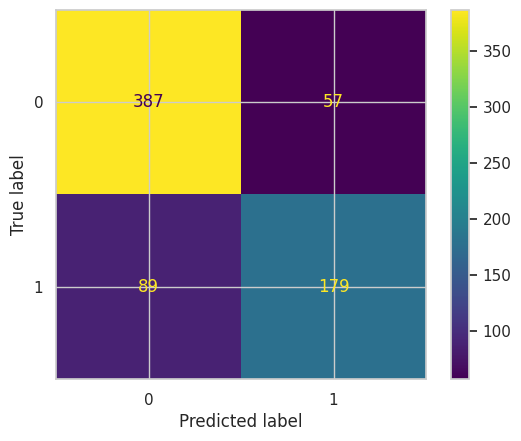

In [209]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
print(confusion_matrix(y_train, y_pred_1))

* No código a seguir, está sendo criada uma **Série** em Python utilizando a biblioteca **pandas**. A variável **sub** é uma série que recebe os valores da variável **p**, com um índice definido a partir da coluna 'PassengerId' do DataFrame **test**. Essa série é exibida utilizando a função **display**, representando a predição de sobrevivência ("Survived") com base nos dados fornecidos.

In [95]:
sub = pd.Series(p, index=test['PassengerId'],name="Survived" )
display(sub)

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

* No código a seguir, está sendo gerado um arquivo CSV denominado "modelo_titanic_29.csv" usando a função **to_csv** da biblioteca **pandas**. Em seguida, o conteúdo desse arquivo é exibido no ambiente de trabalho utilizando a função **display**. Essas linhas indicam a exportação de resultados do modelo Titanic para um arquivo CSV, possibilitando a visualização dos dados resultantes.

In [96]:
sub.to_csv("/kaggle/working/modelo_titanic_29.csv")
display(sub)

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64